# The Ames Dataset

We load the final housing dataset, after preprocessing. 

In [344]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

housing = pd.read_csv('data/ames_final.csv')

In [350]:
#housing.count()
#housing.columns

# Plotting Data

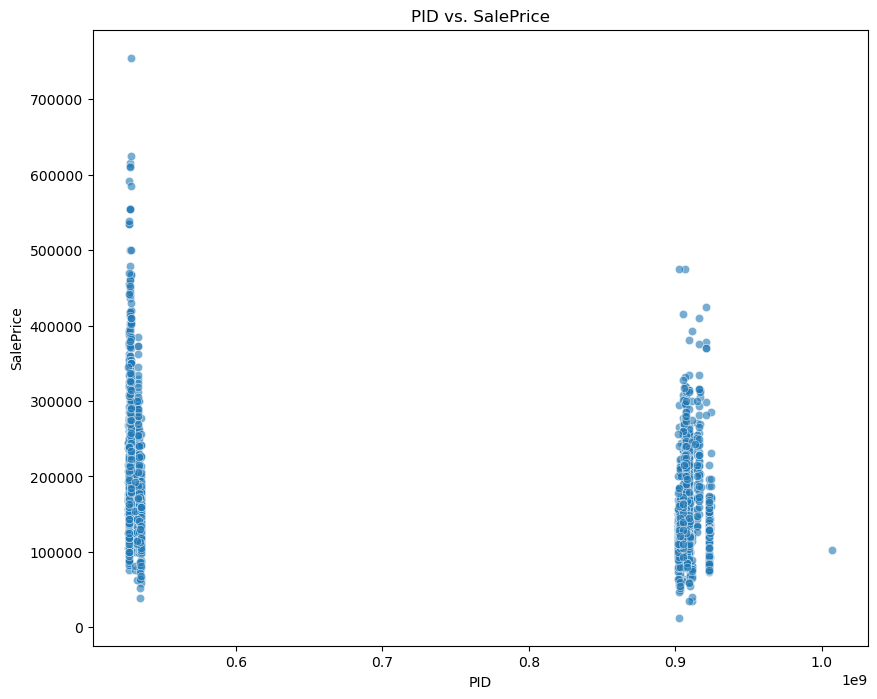

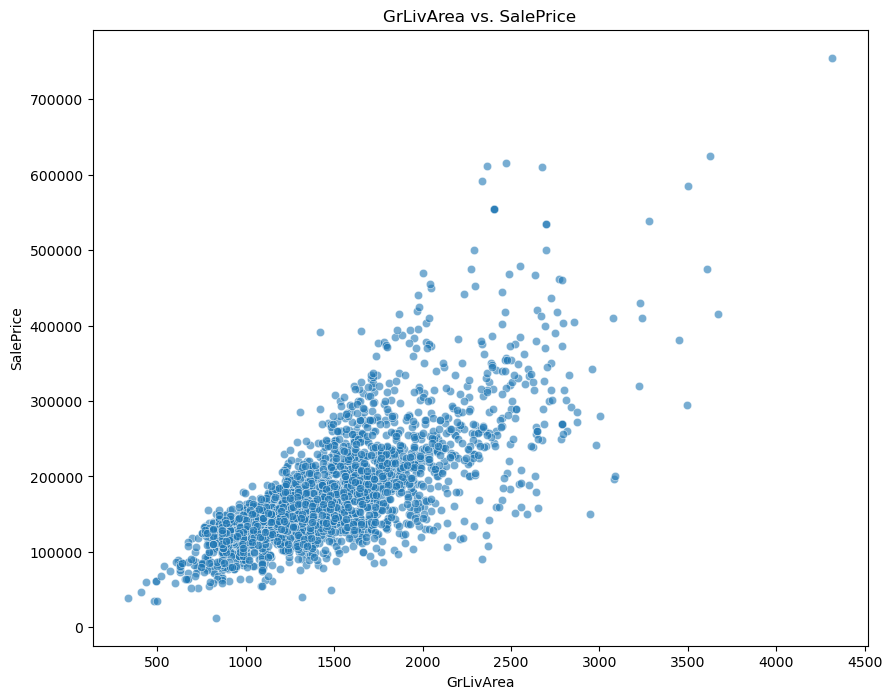

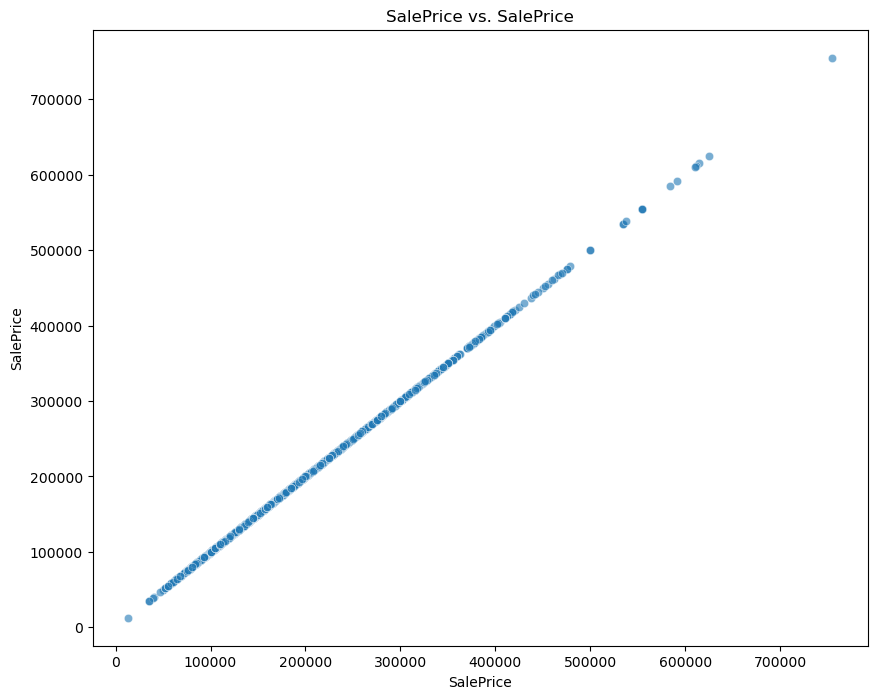

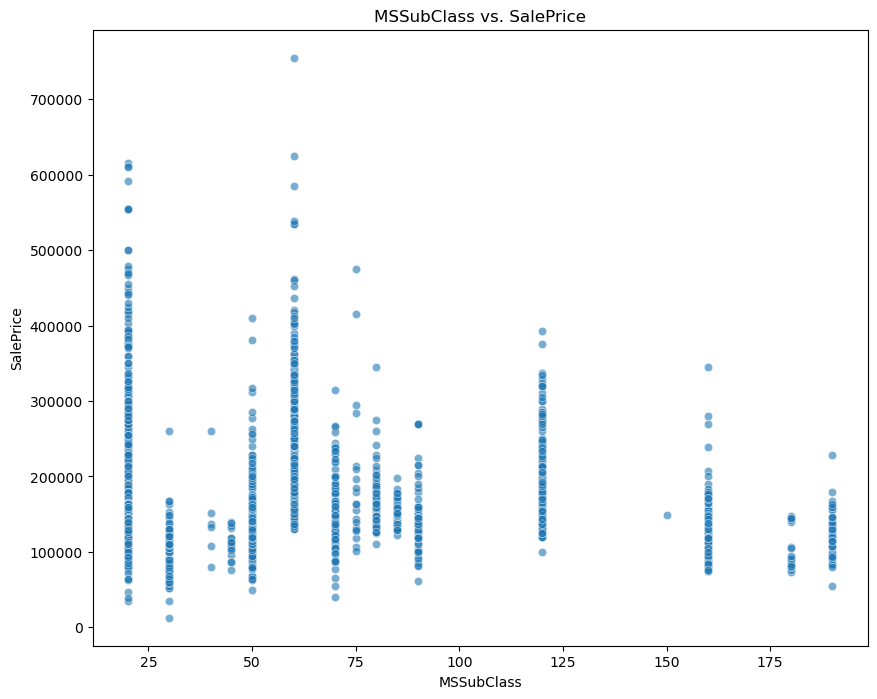

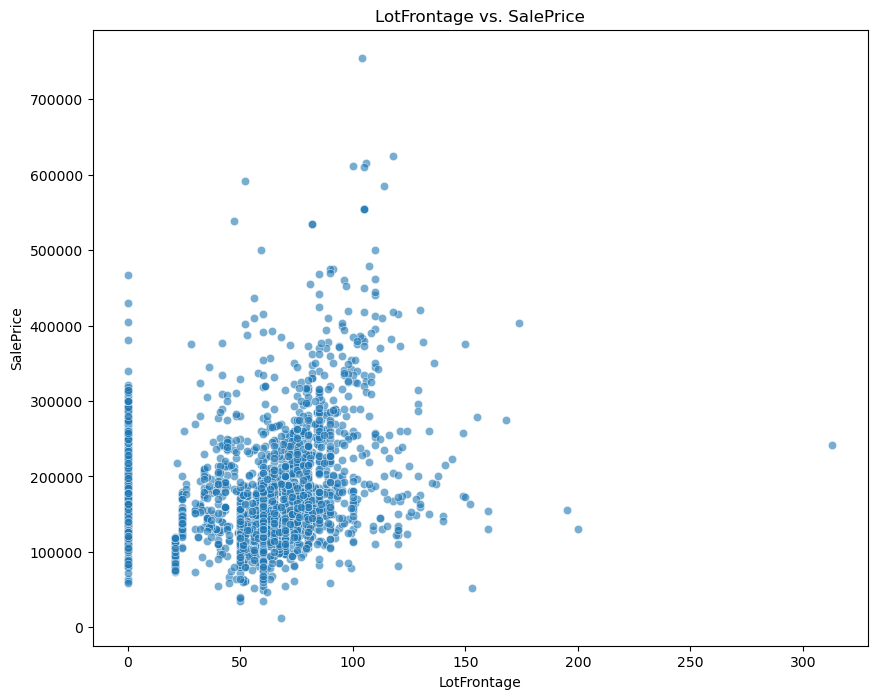

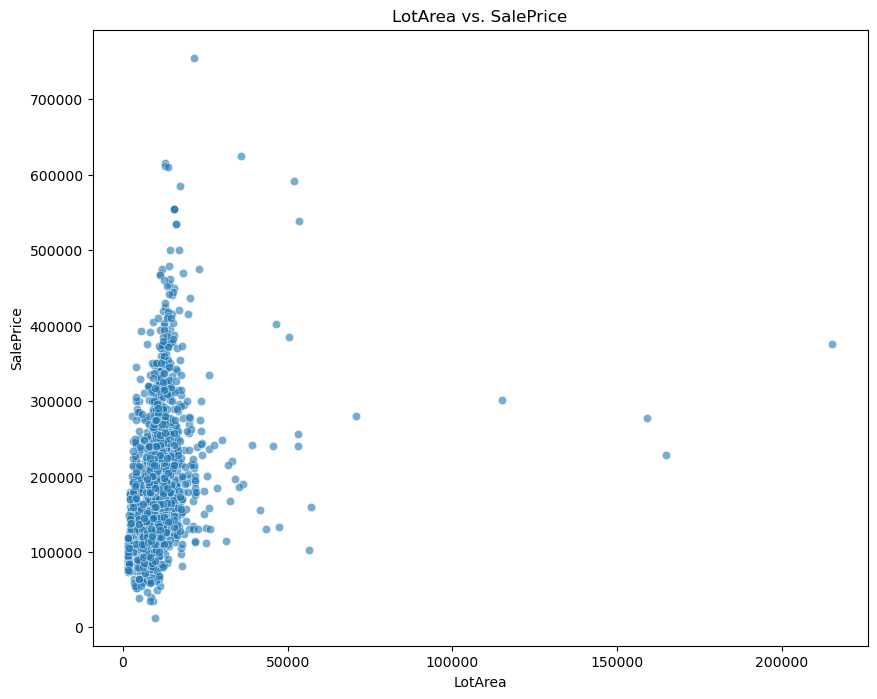

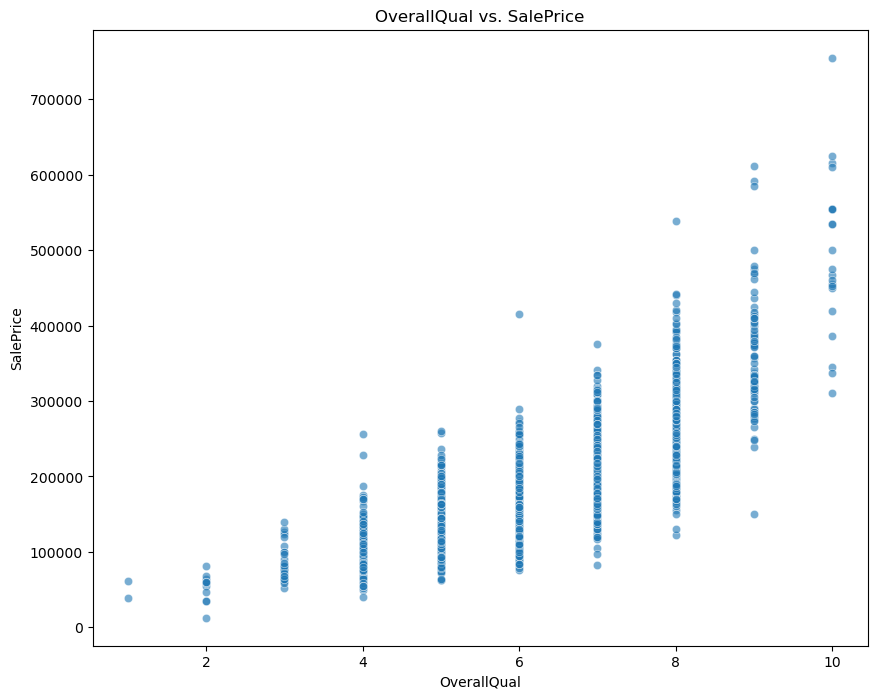

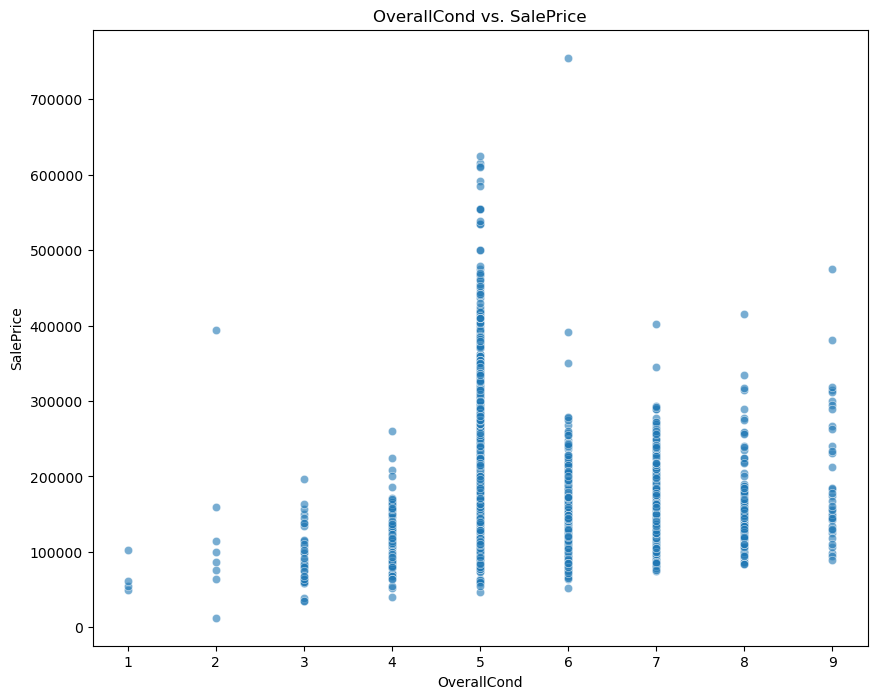

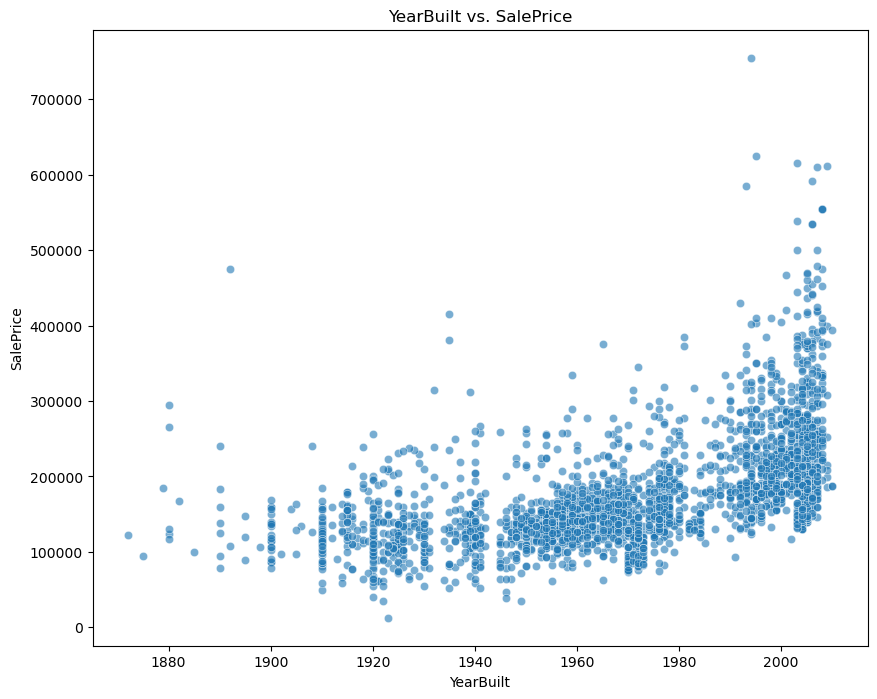

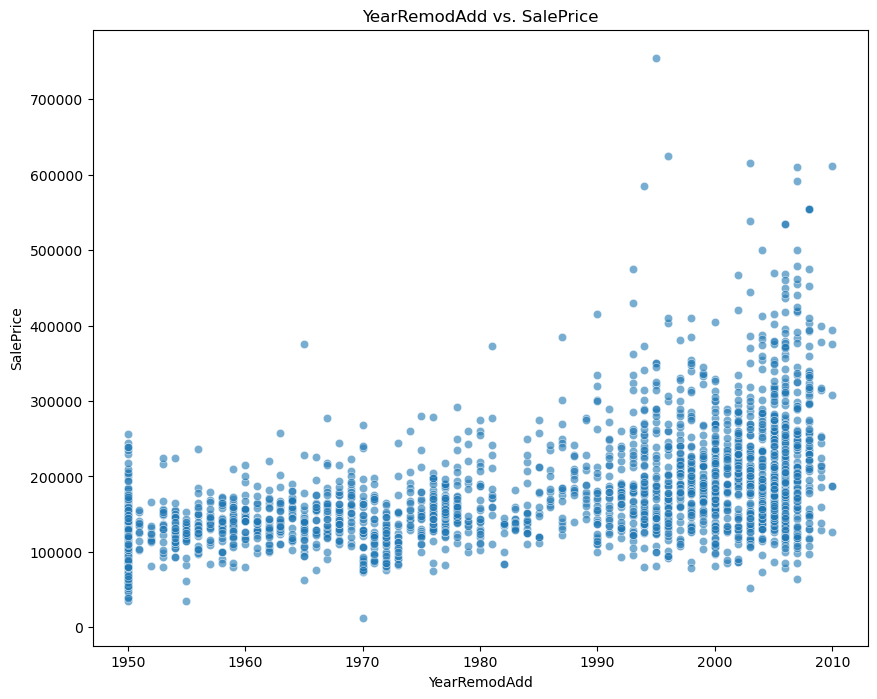

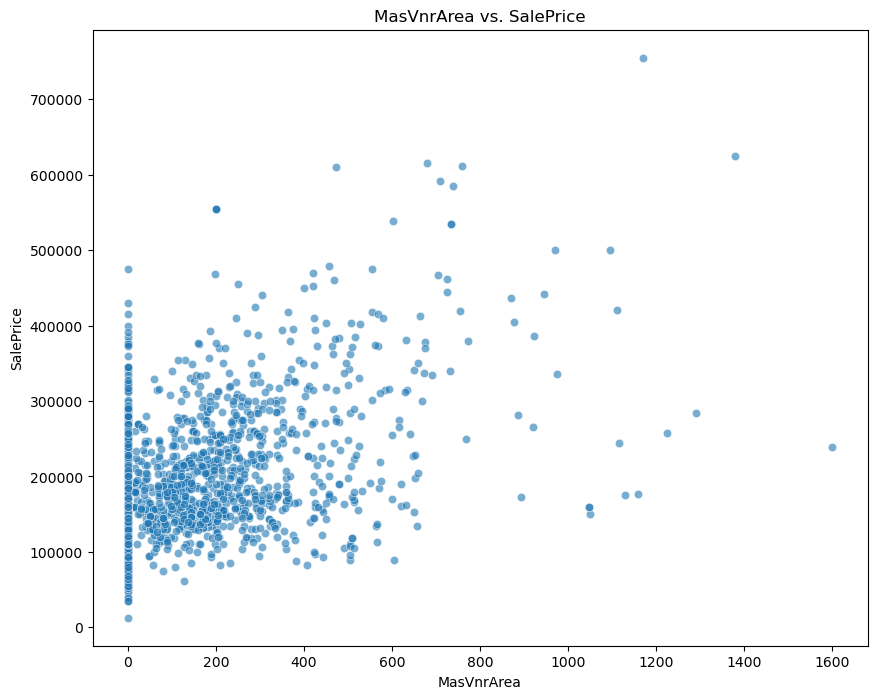

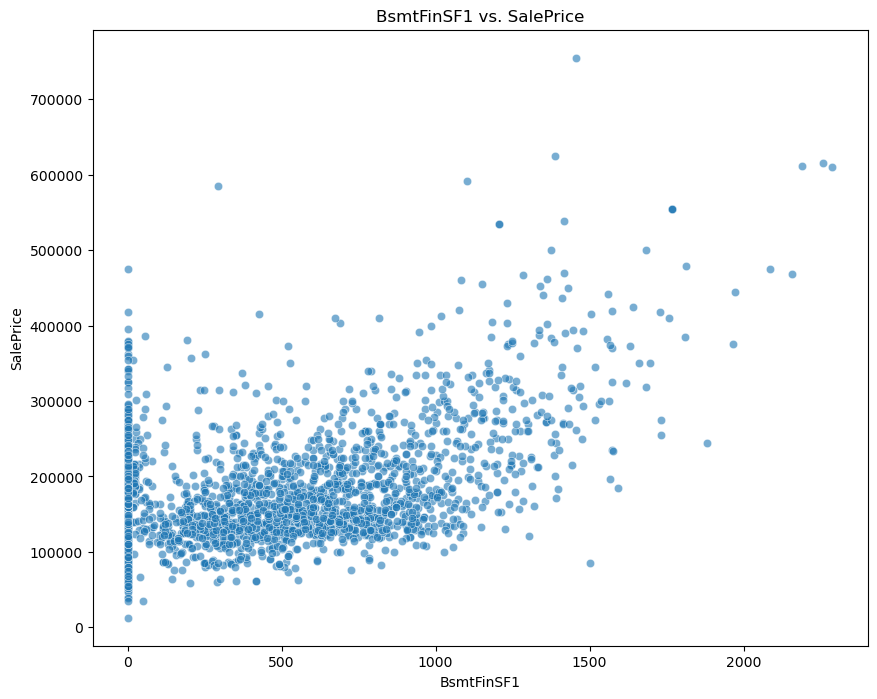

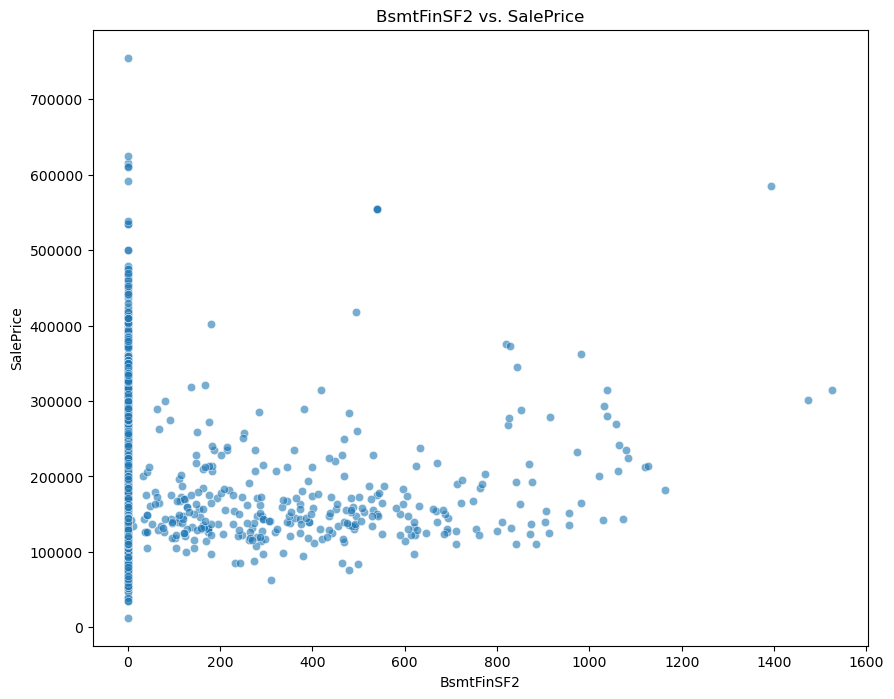

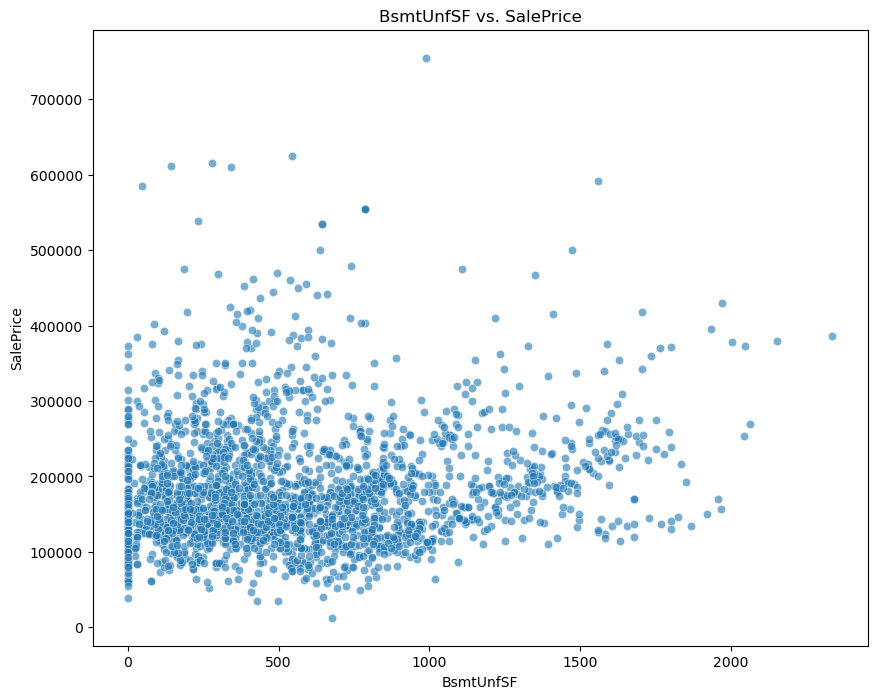

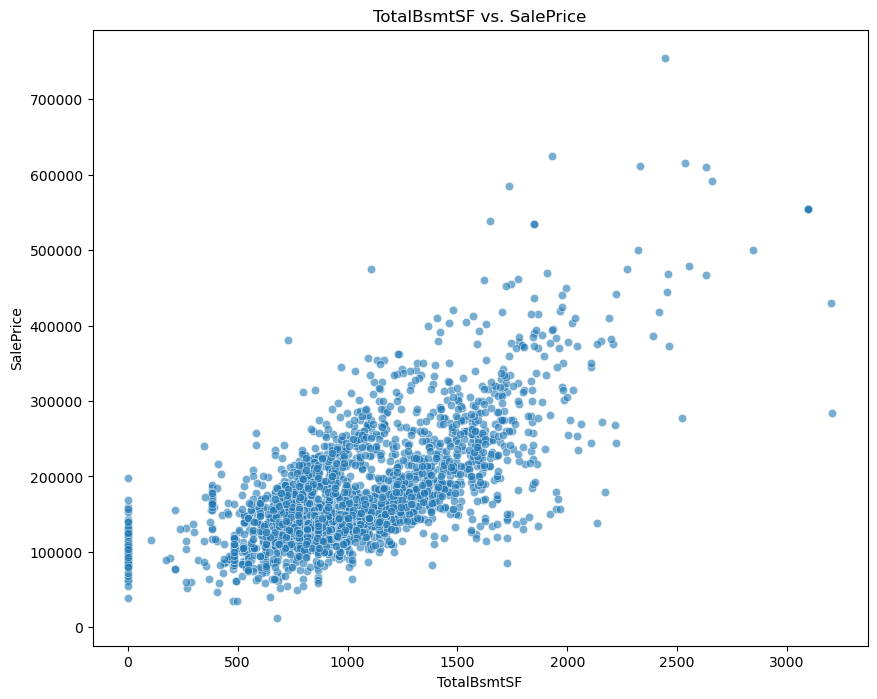

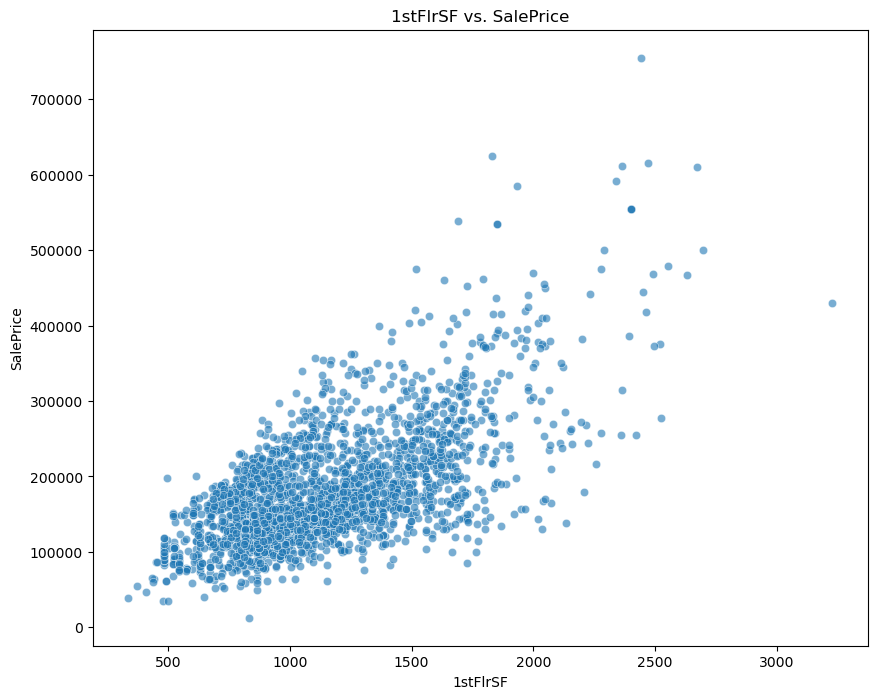

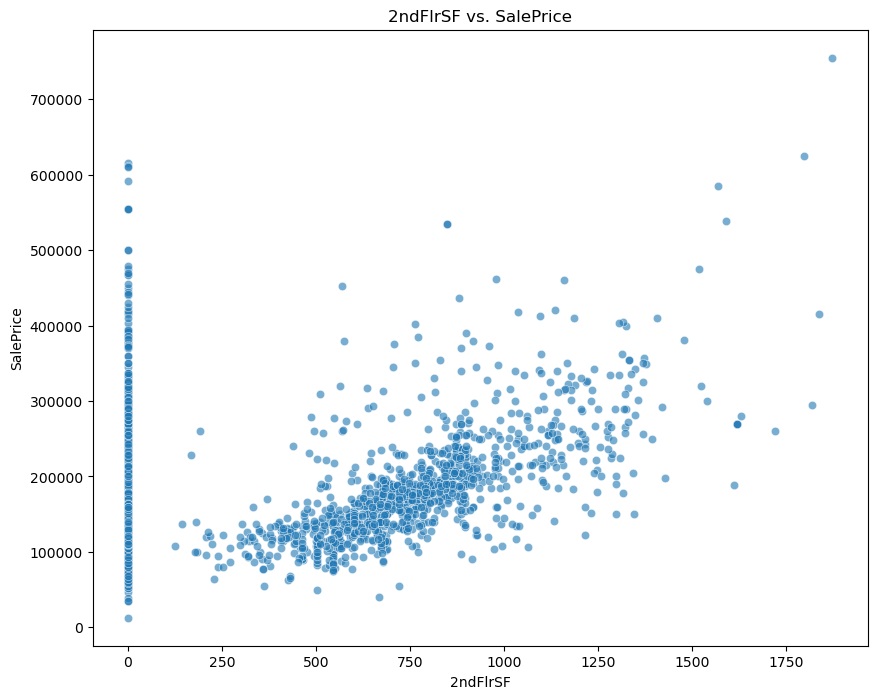

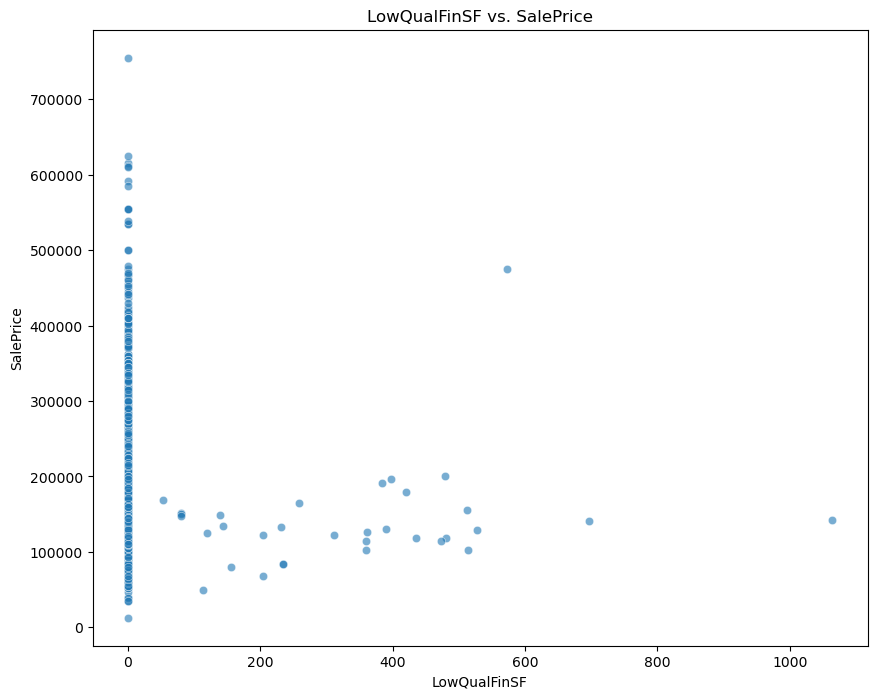

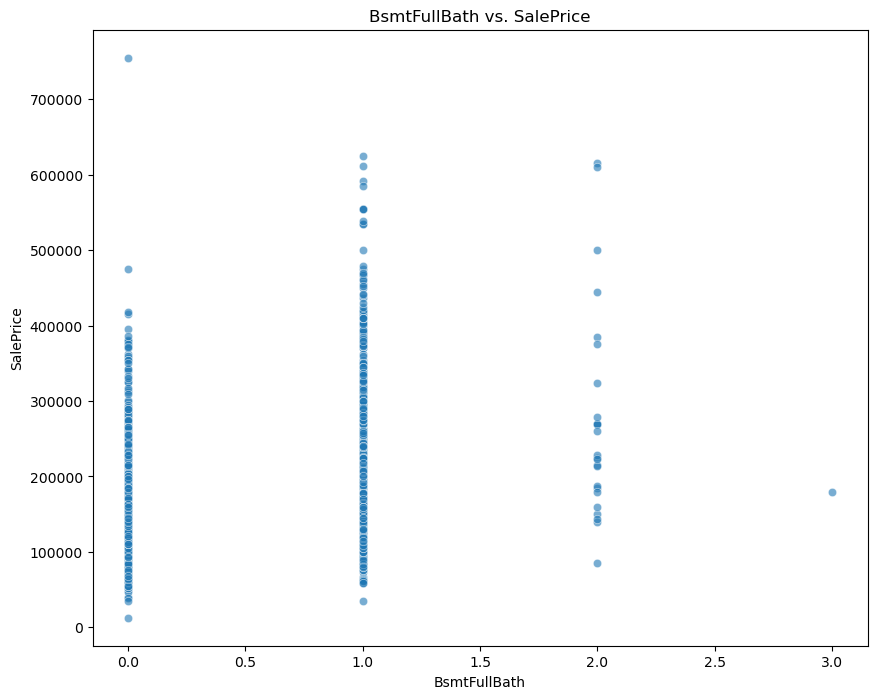

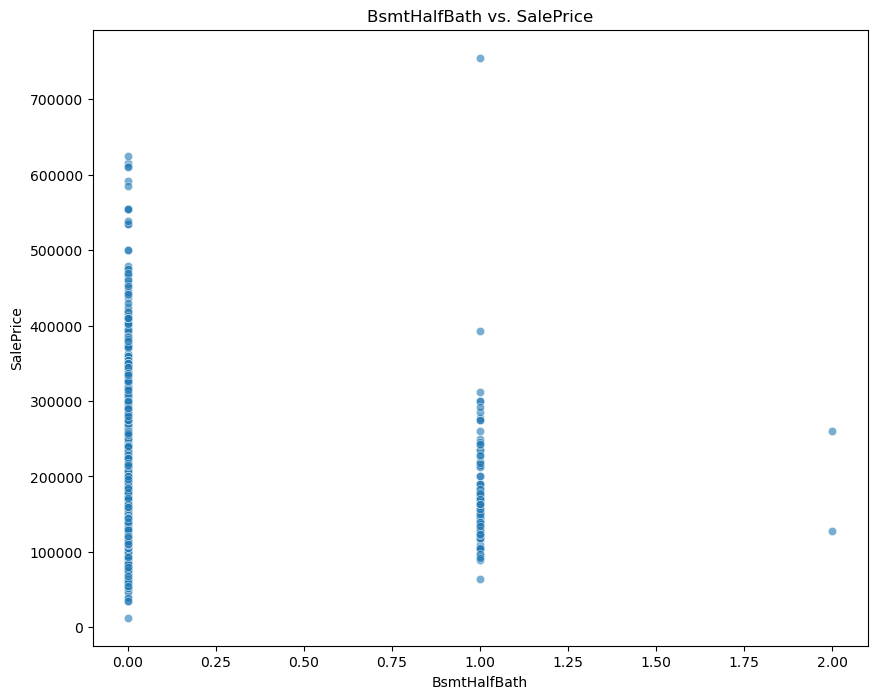

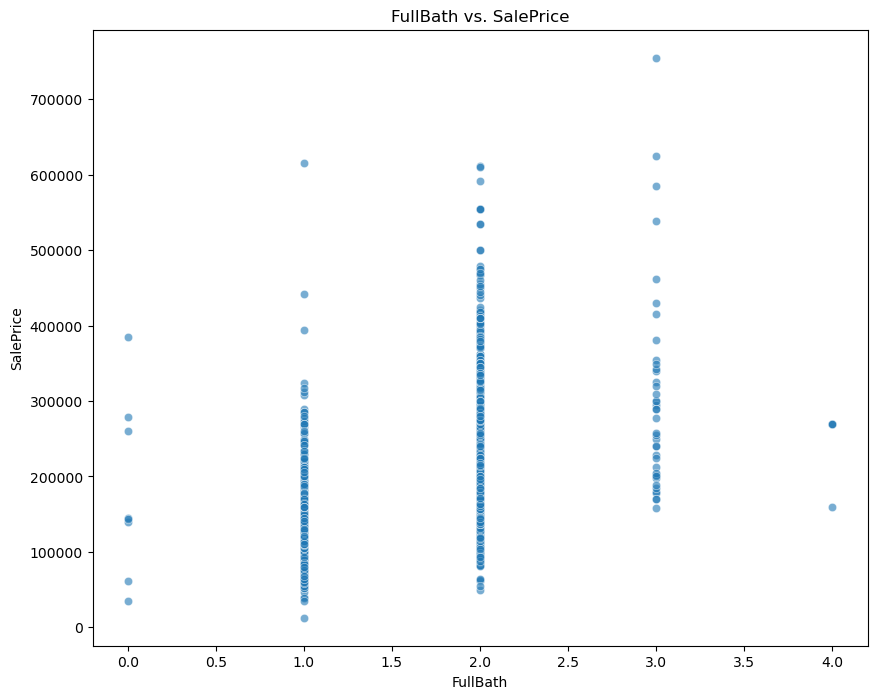

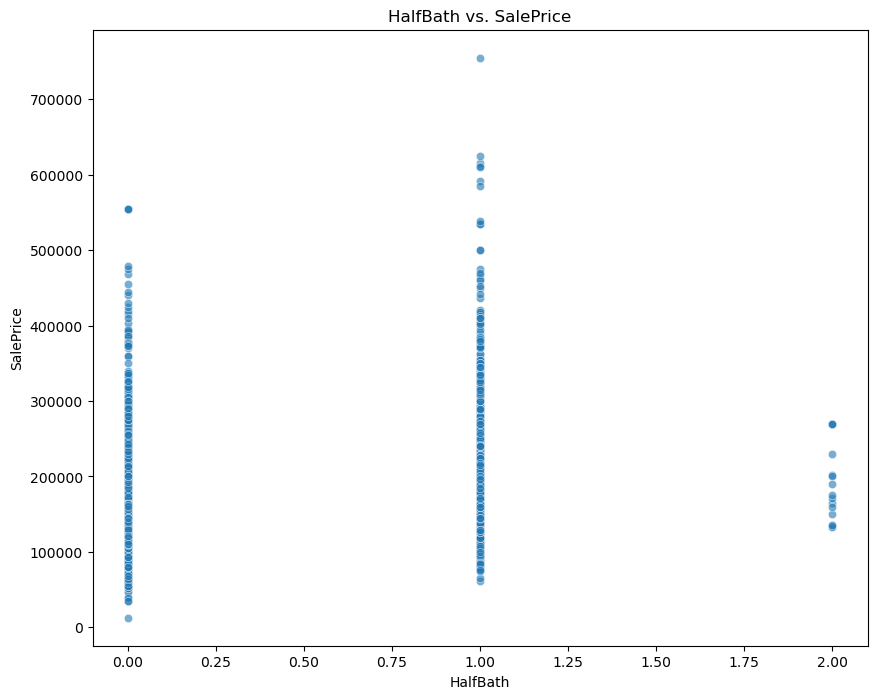

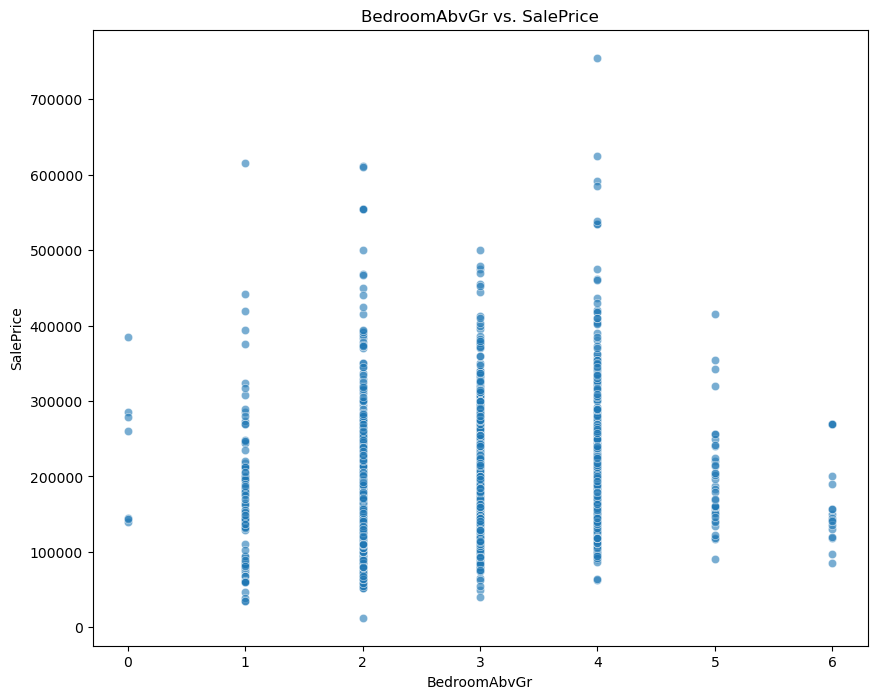

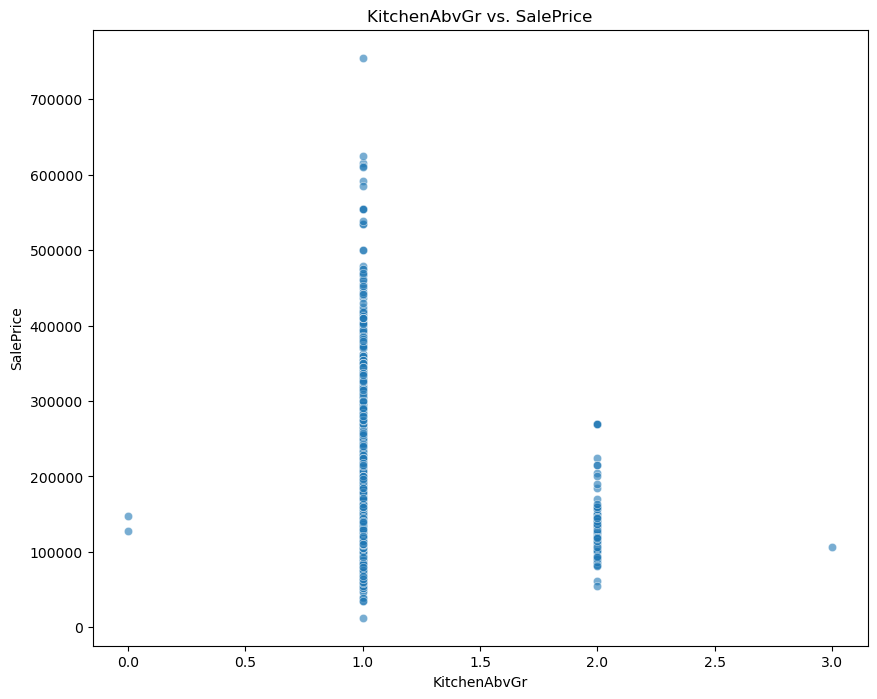

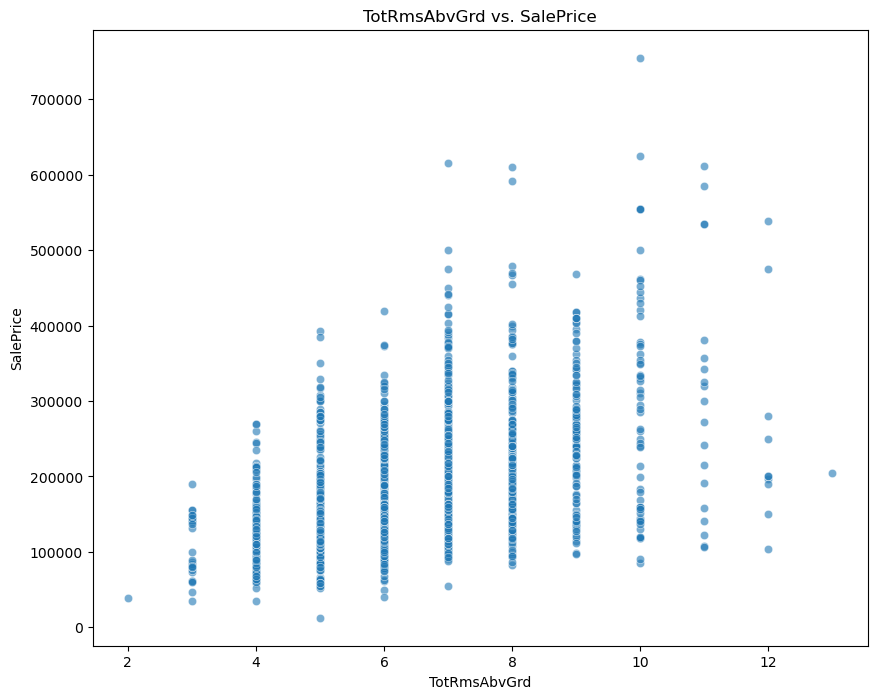

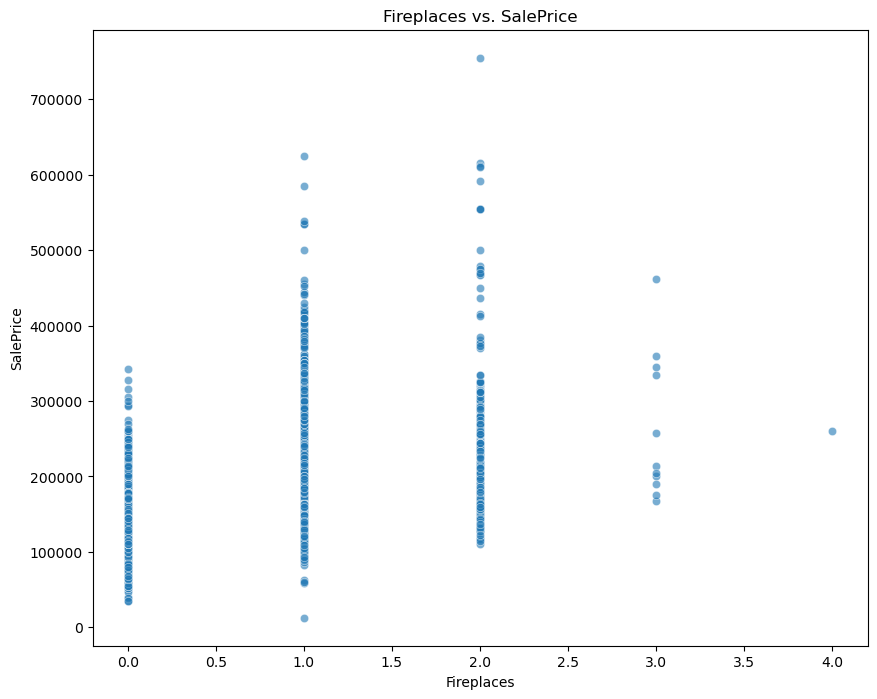

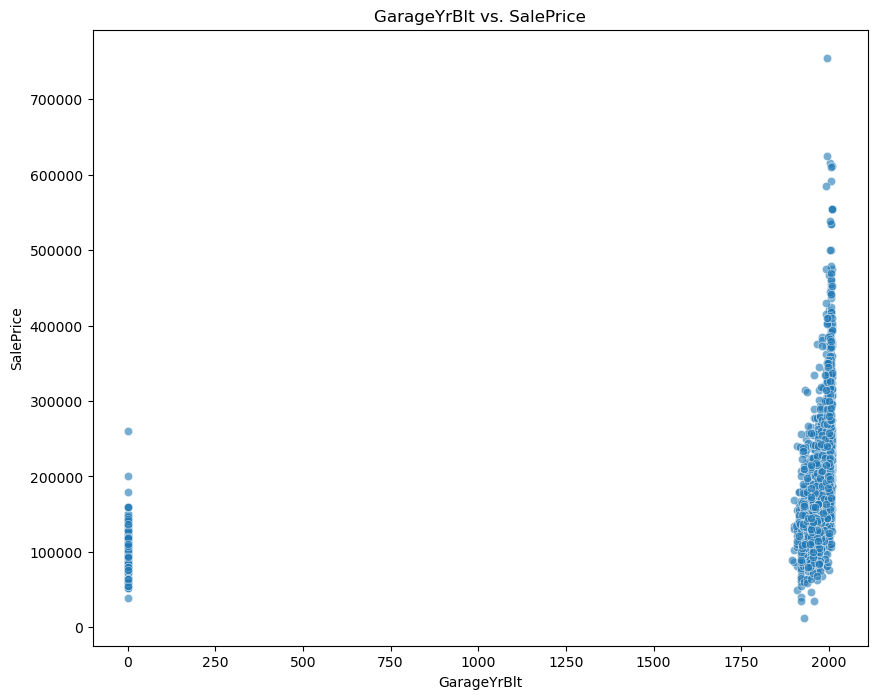

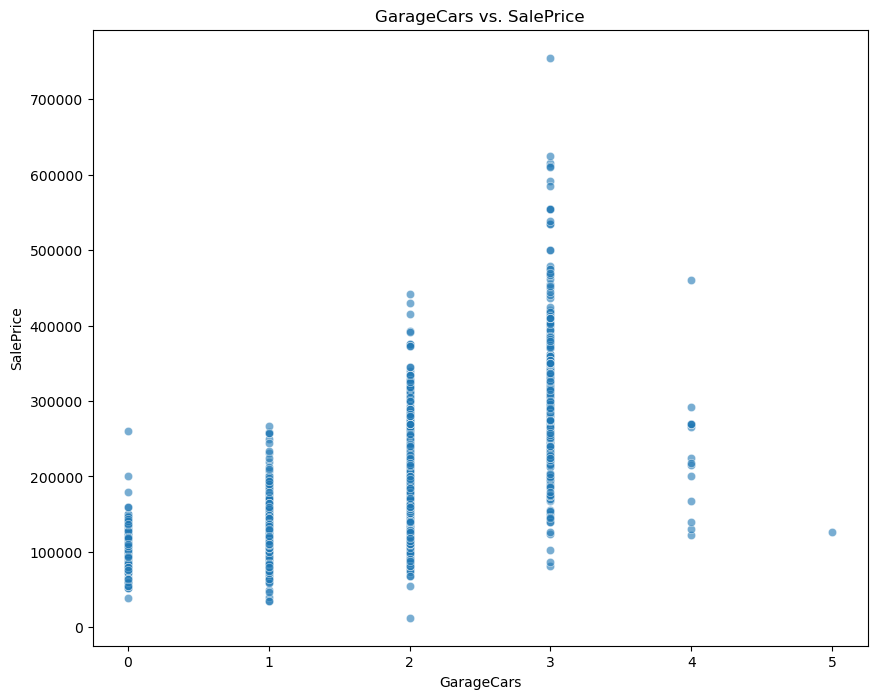

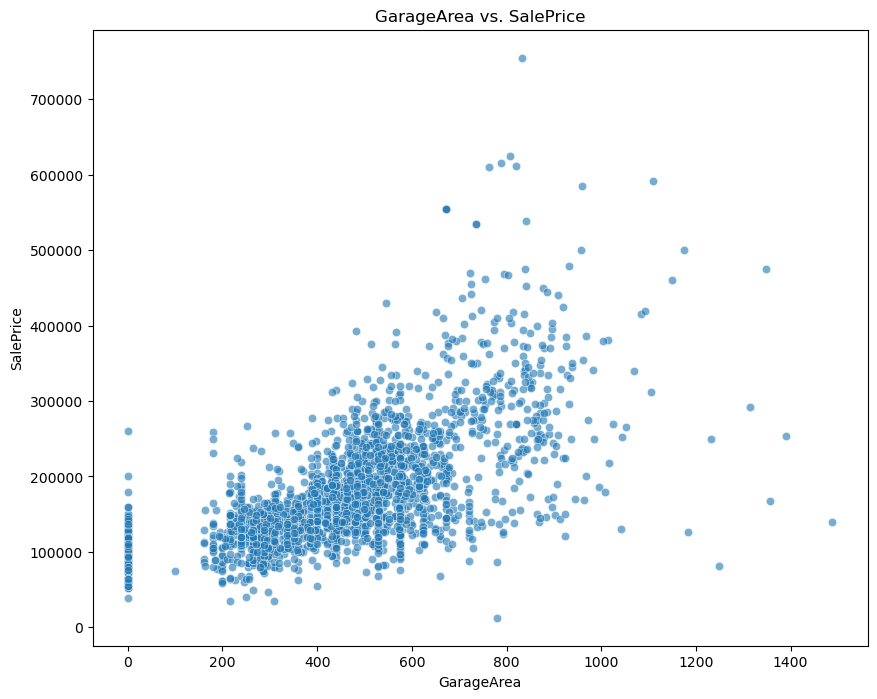

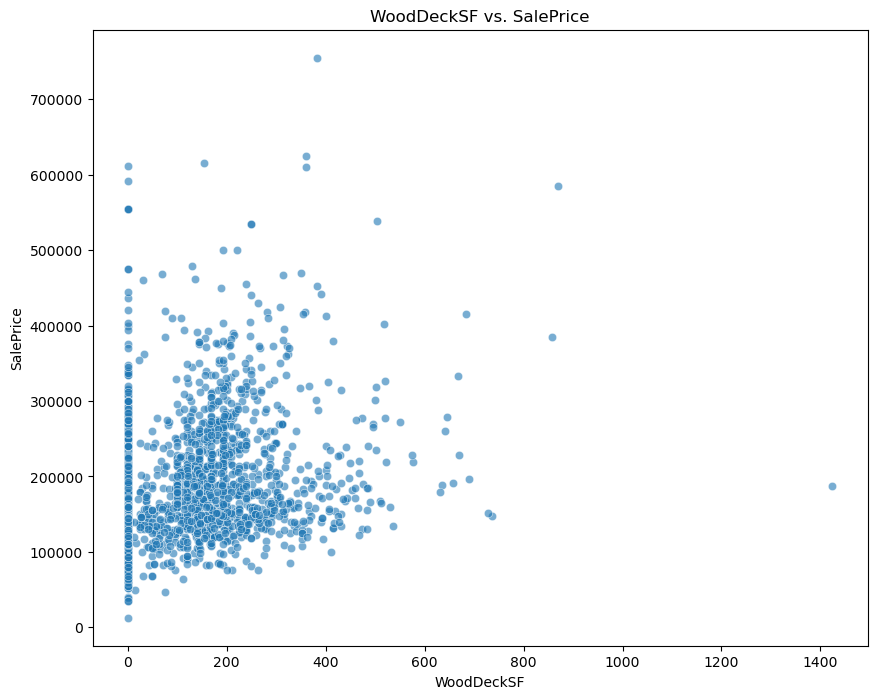

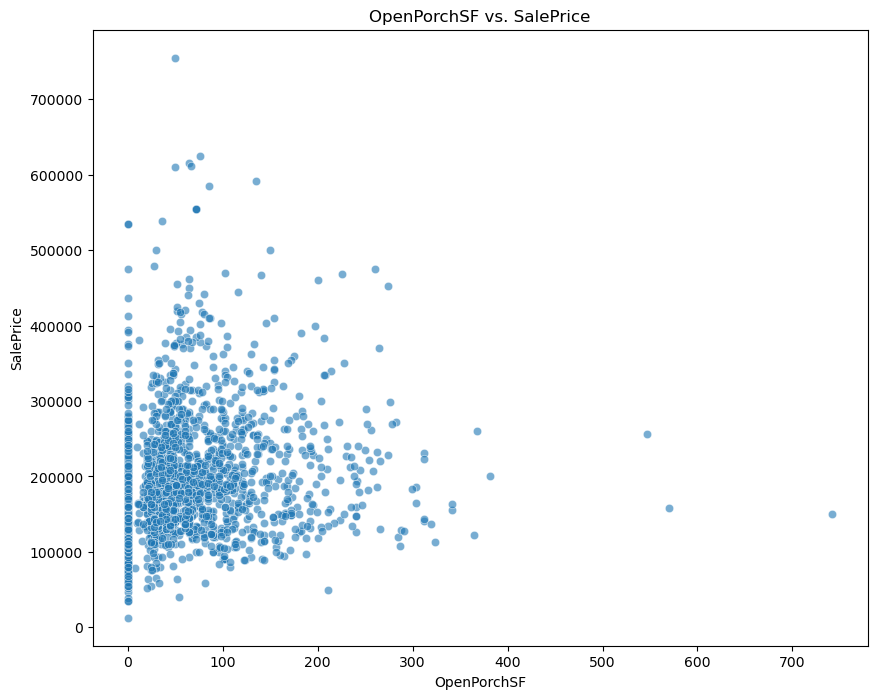

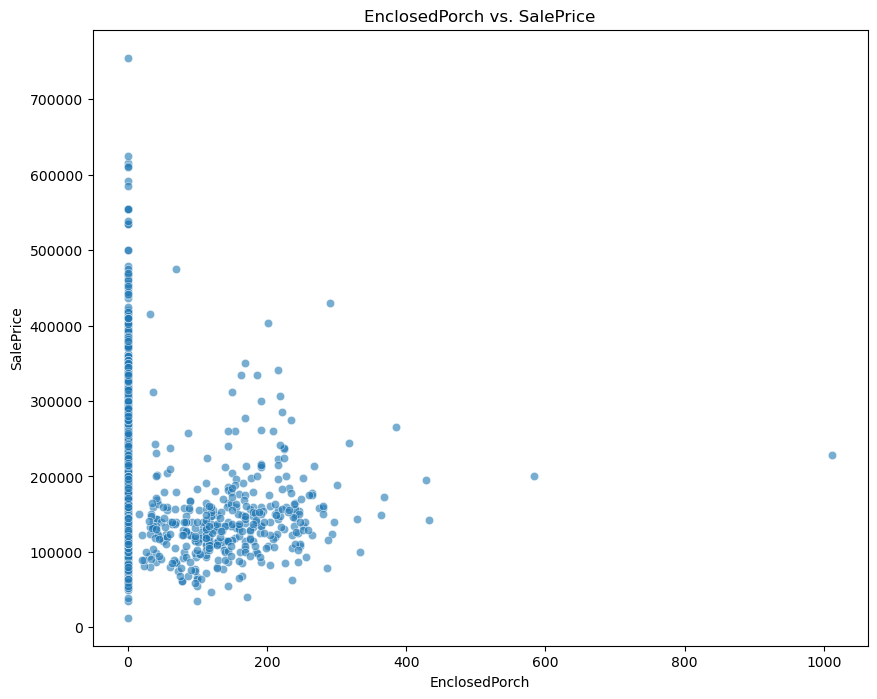

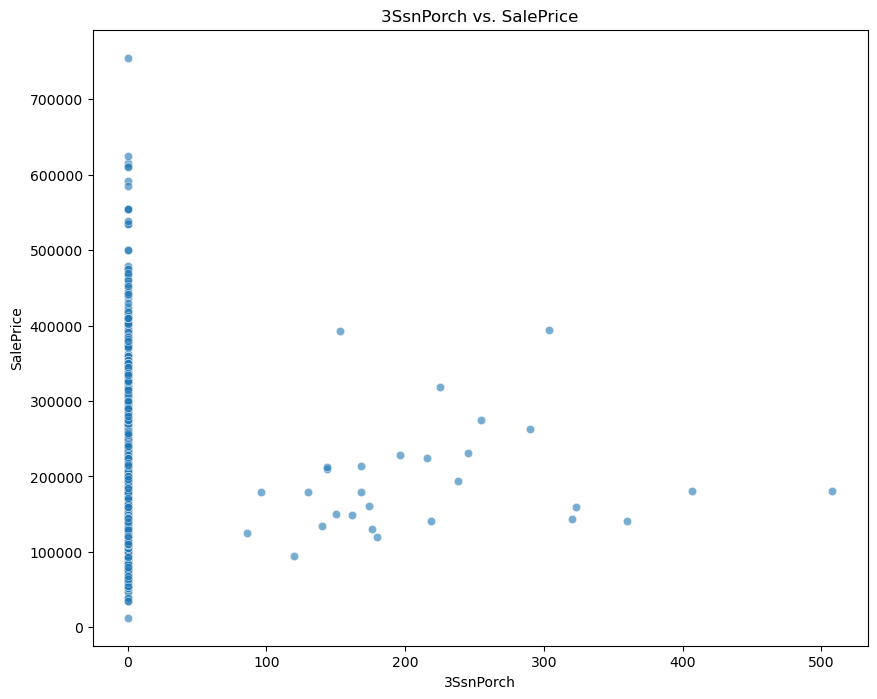

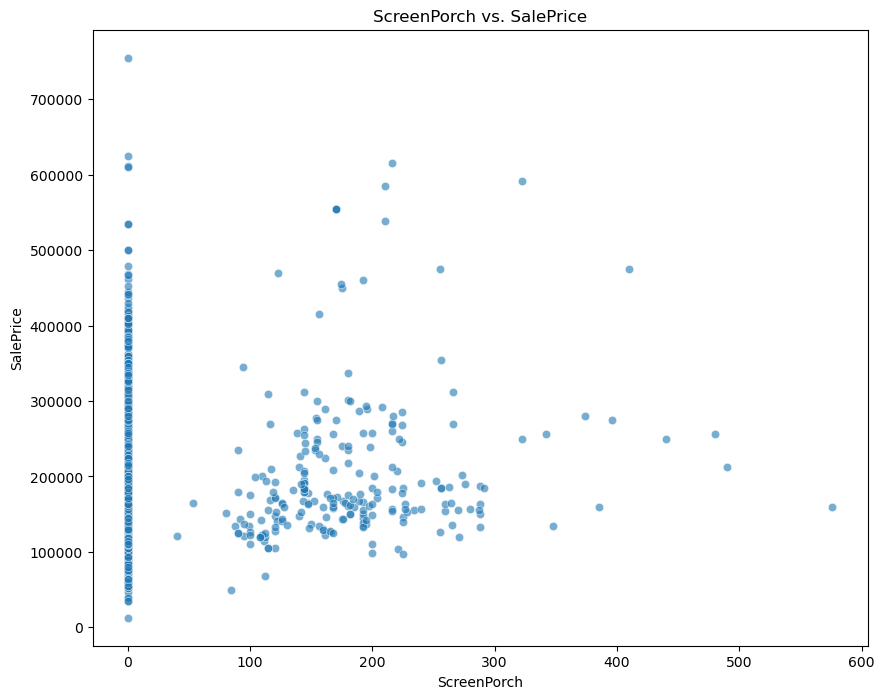

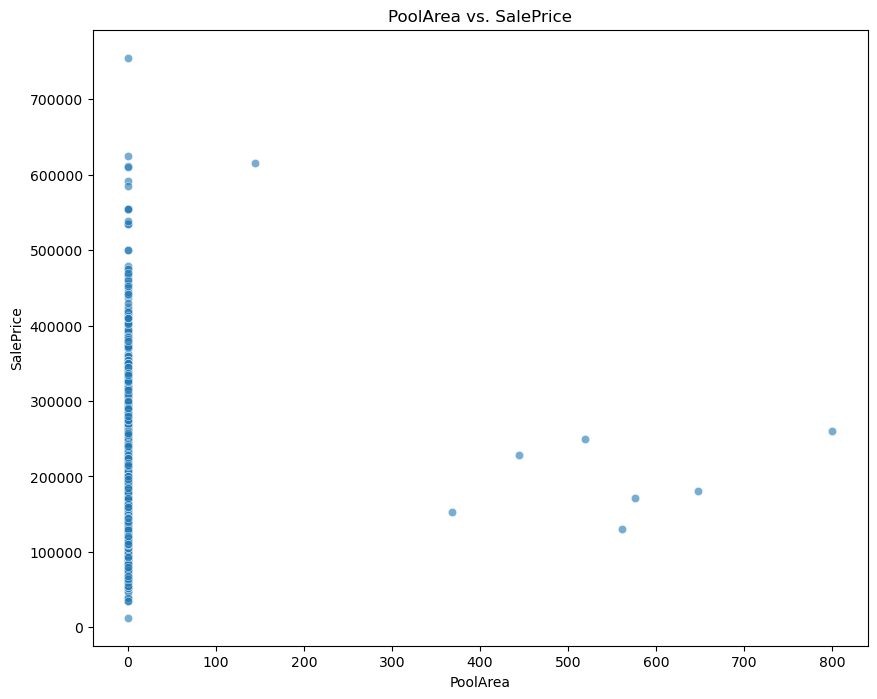

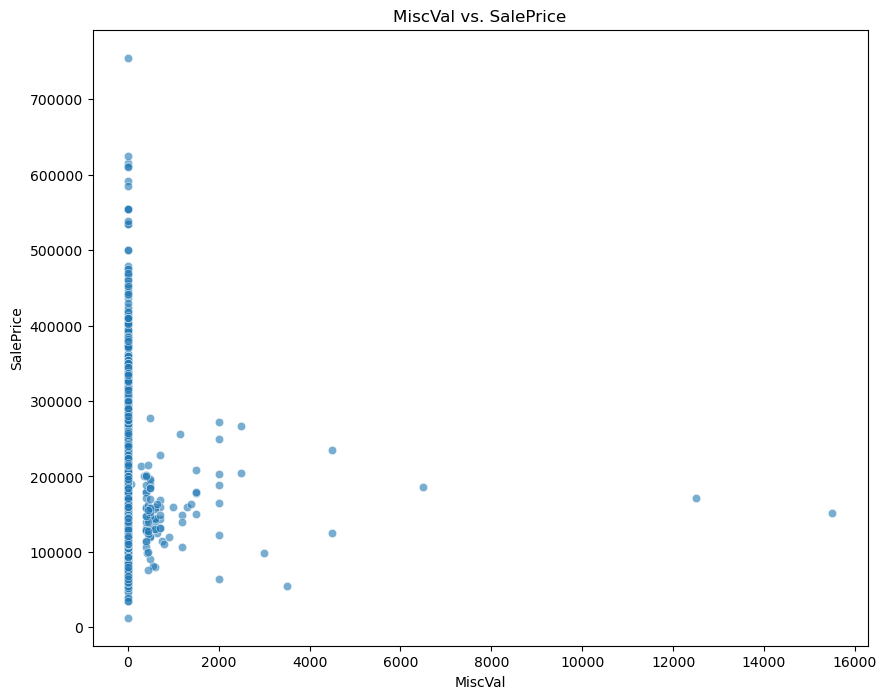

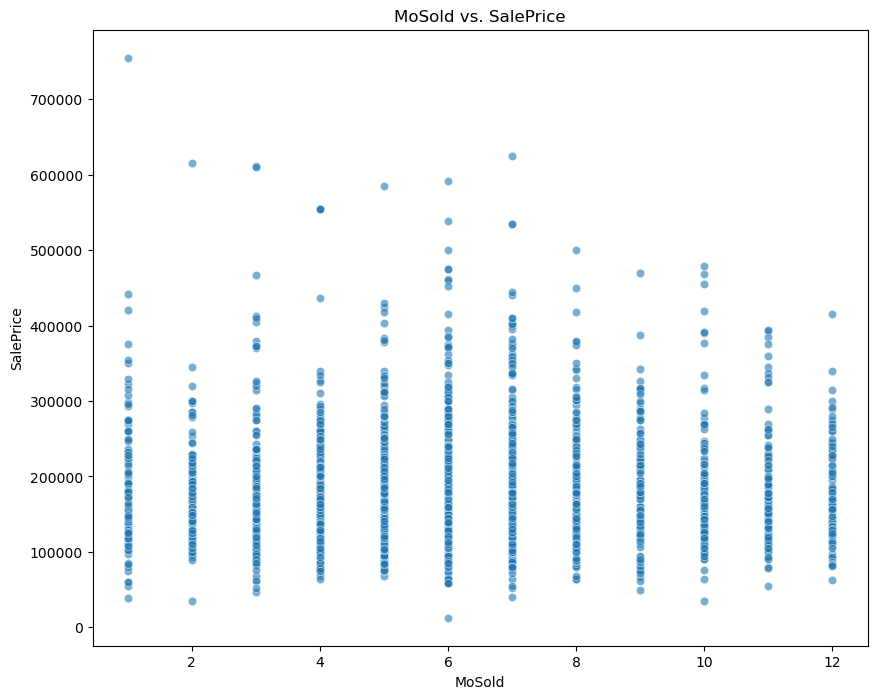

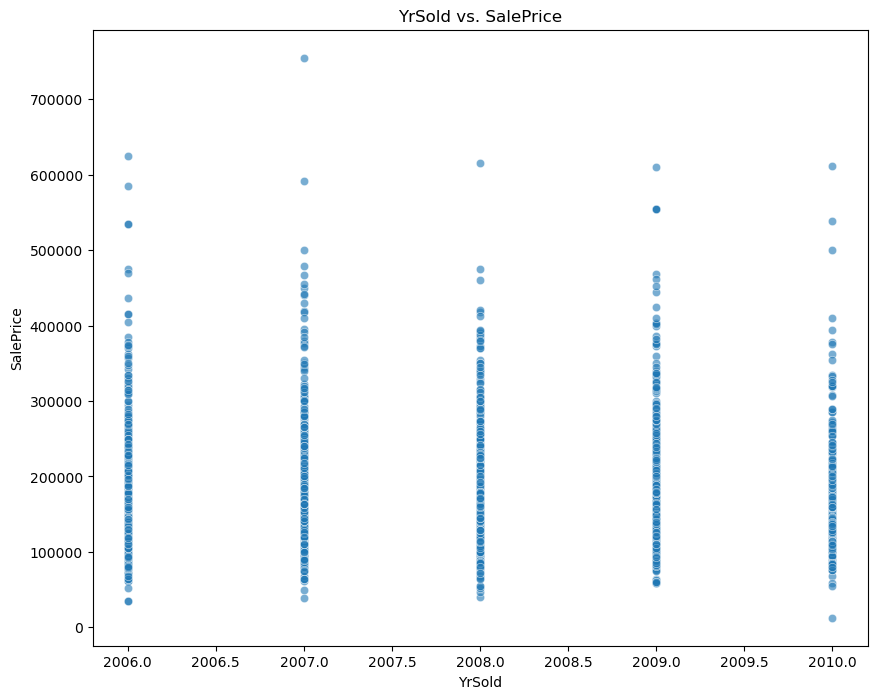

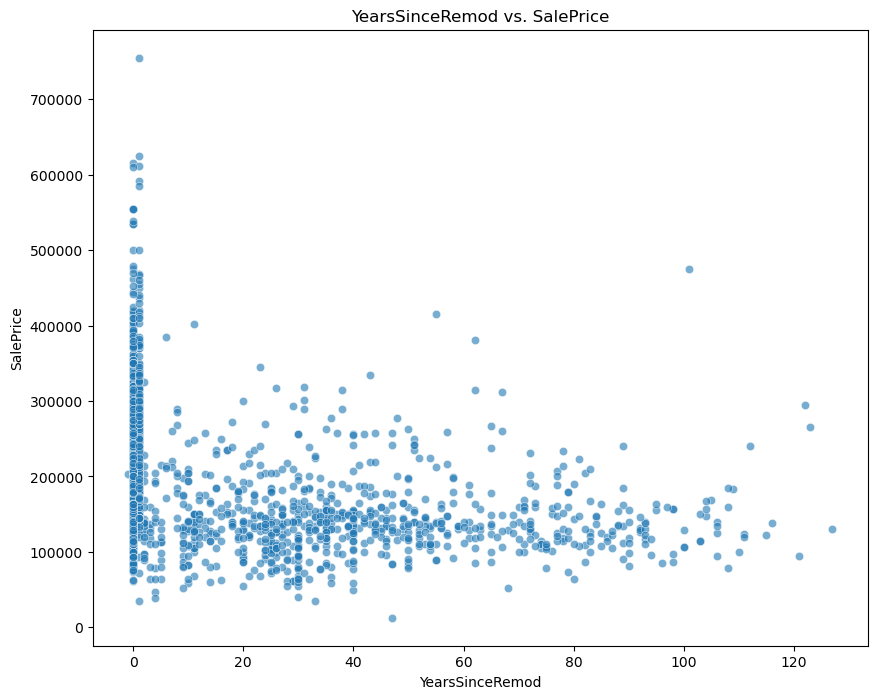

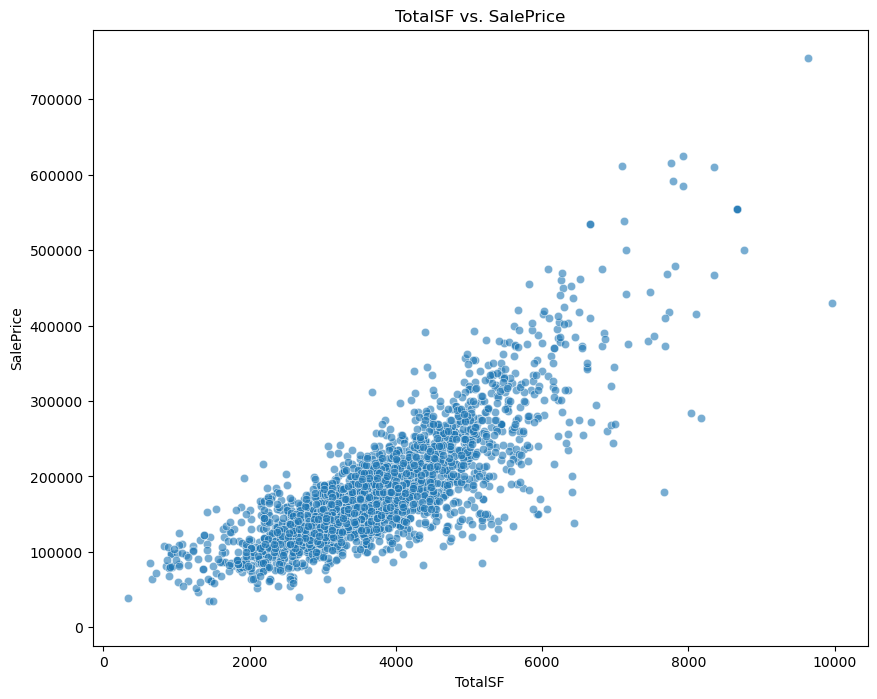

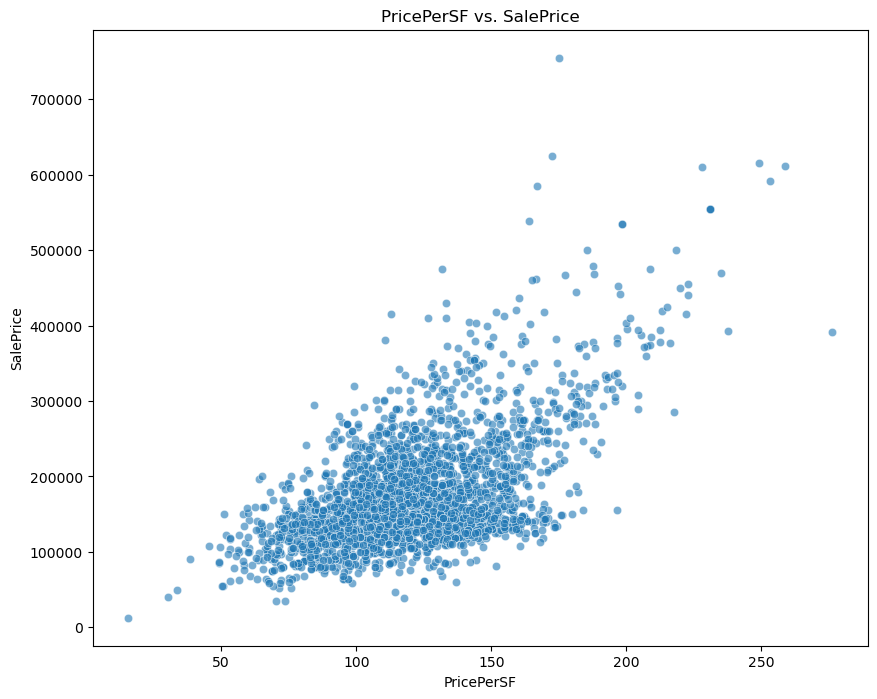

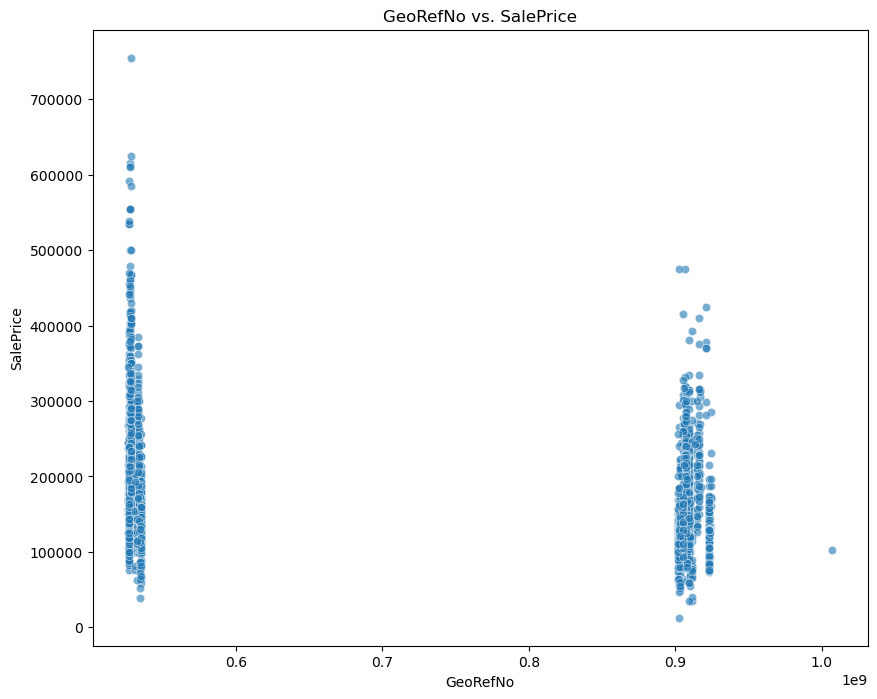

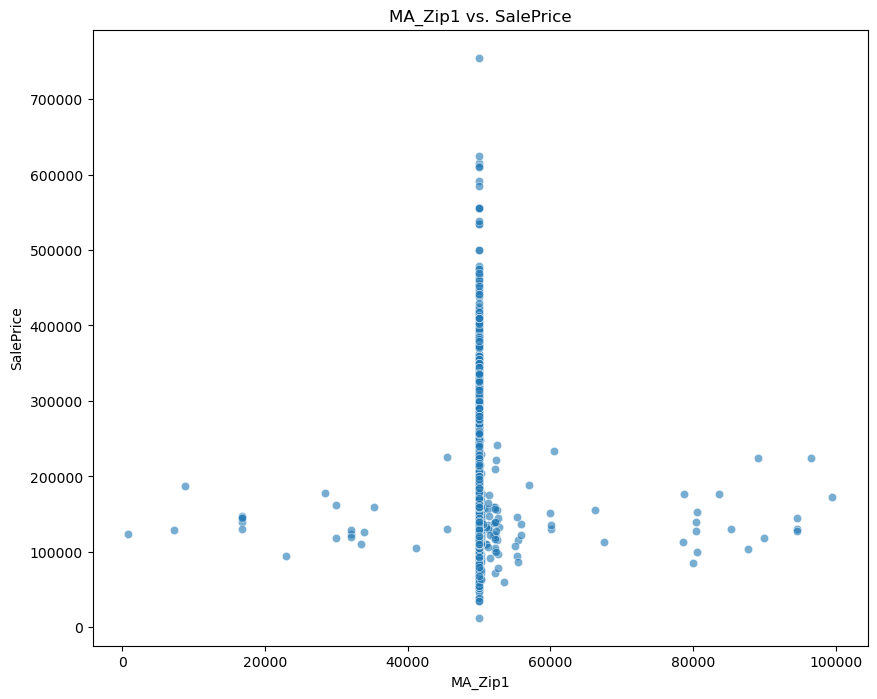

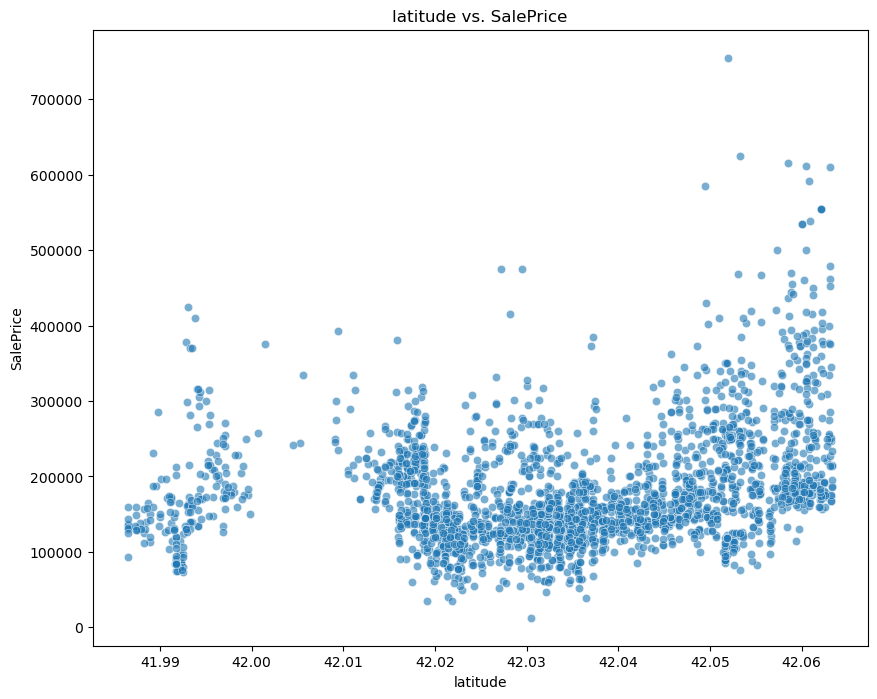

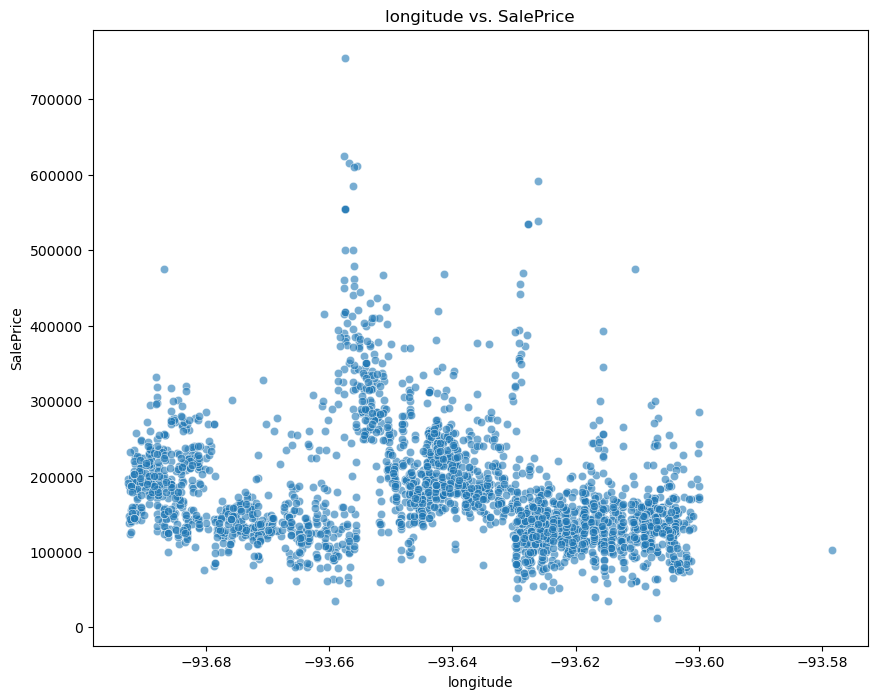

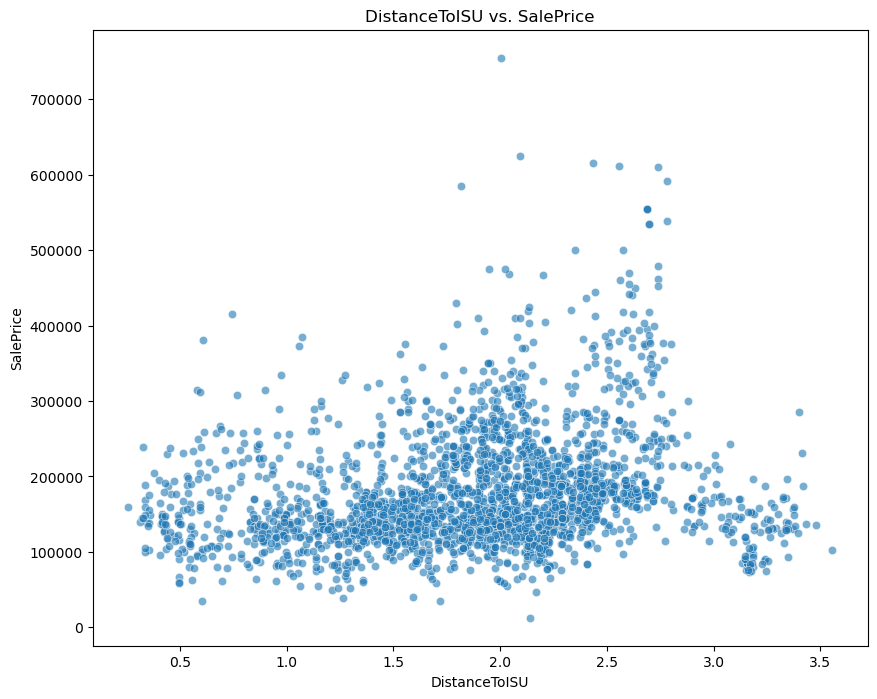

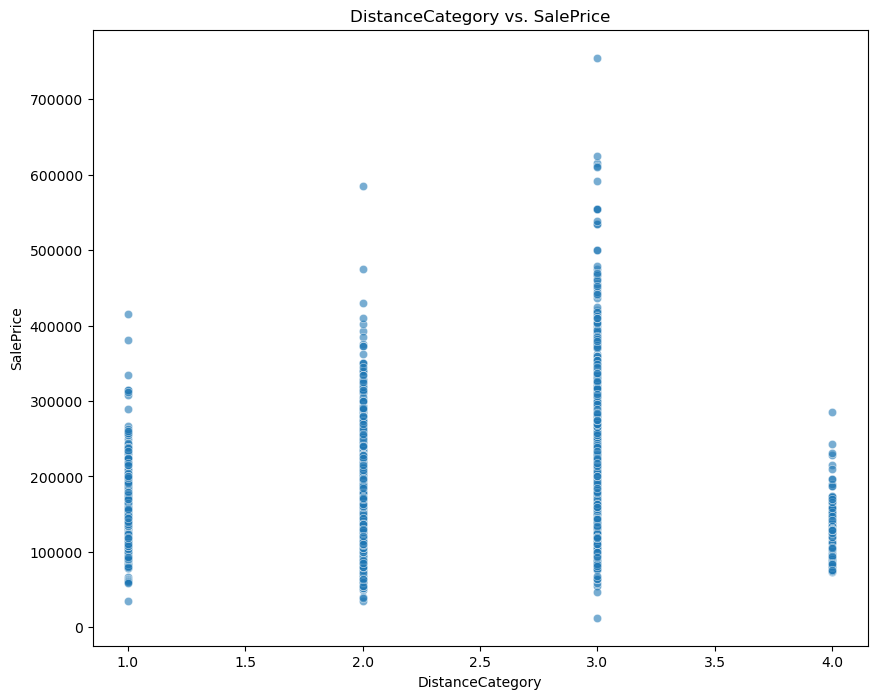

In [351]:
# Loop through each feature and examine
for i, feature in enumerate(housing.columns):
    if housing[feature].dtype=='object':
        #print(i)
        continue
    else:
        plt.figure(figsize=(10, 8))
        sns.scatterplot(data=housing, x=feature, y='SalePrice', alpha=0.6)
        plt.title(f'{feature} vs. SalePrice')
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()



# Examining Correlations

/tmp/ipykernel_49672/3640489597.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



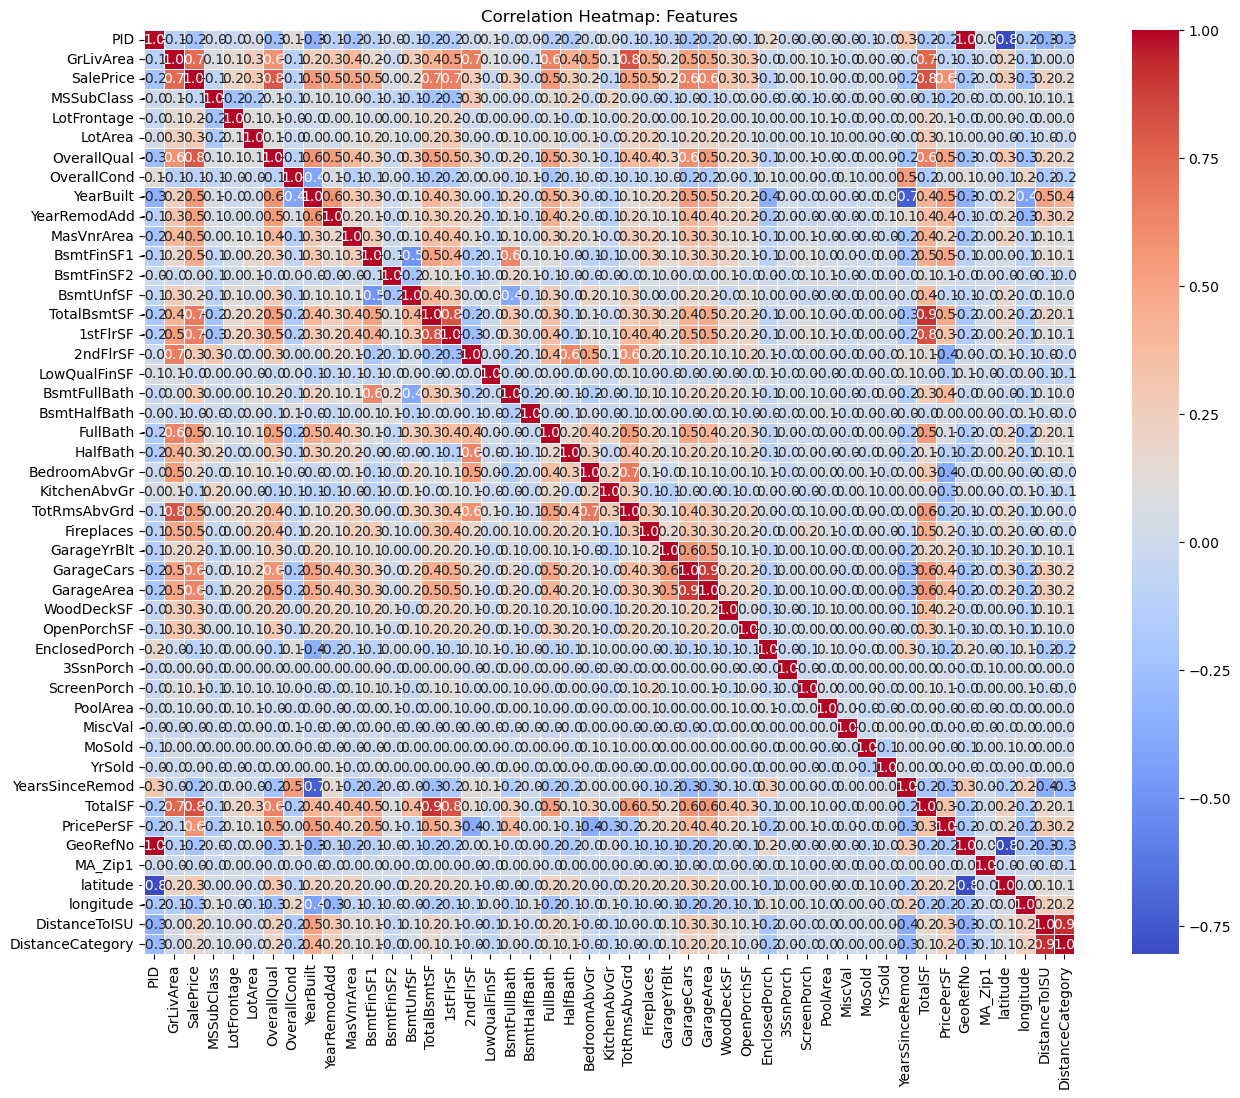

In [352]:
# Calculate the correlation matrix
corr_matrix = housing.corr()
# Choose a larger figure size
plt.figure(figsize=(15, 12))
# Choose a colormap that enhances visibility
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a heatmap
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".1f", linewidths=0.5)

plt.title('Correlation Heatmap: Features')
plt.show()


/tmp/ipykernel_49672/4275902319.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/tmp/ipykernel_49672/4275902319.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




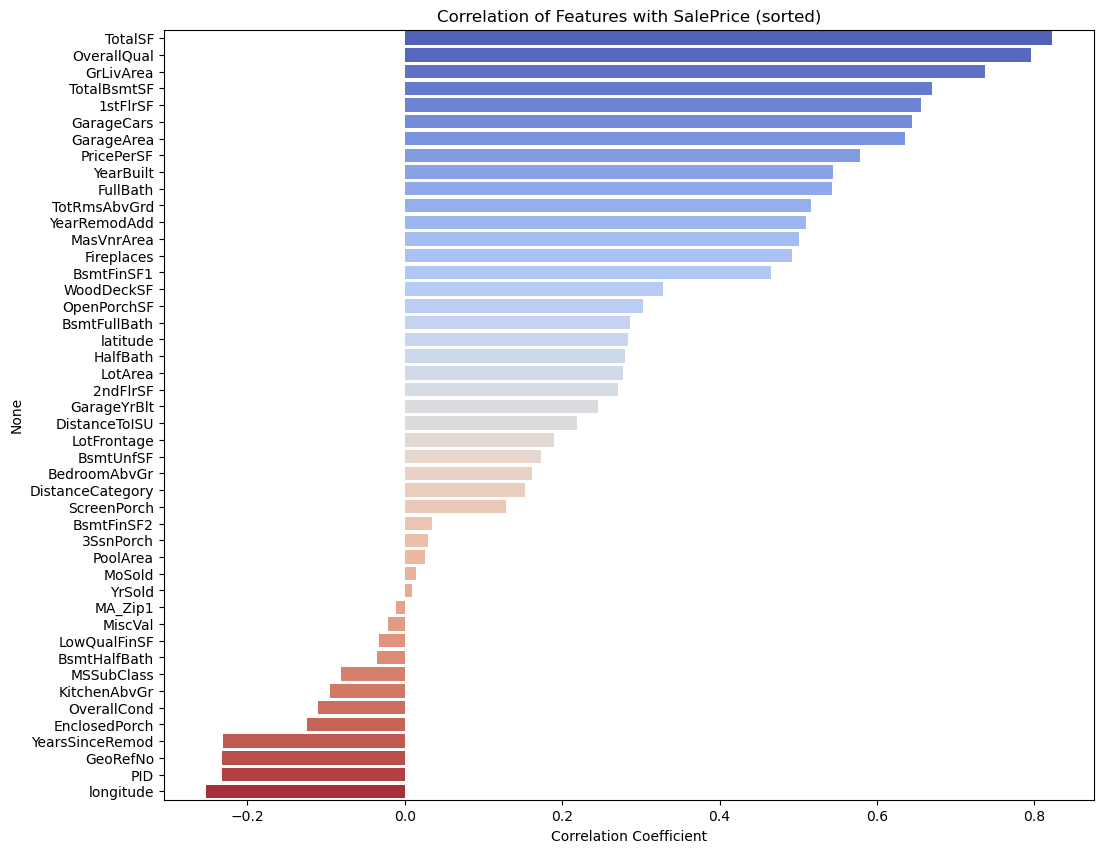

In [353]:
# Calculate the correlation matrix
corr_matrix = housing.corr()

# Get the correlation of all features with 'SalePrice', sort them, and drop 'SalePrice'
sorted_corrs = corr_matrix['SalePrice'].sort_values(ascending=False).drop('SalePrice')

# Plot the sorted correlations
plt.figure(figsize=(12, 10))
sns.barplot(y=sorted_corrs.index, x=sorted_corrs.values, palette='coolwarm')

plt.title('Correlation of Features with SalePrice (sorted)')
plt.xlabel('Correlation Coefficient')
plt.show()


OverallQual, GrLivArea, TotalBsmtSF, 1stFlrSF, GarageArea, YearBuilt, FullBath, GarageYrBlt, YearRemodAdd, MasVnrArea, Fireplaces

# Plots for EDA

In [354]:
#plot of price versus date sold, time series
#plot of group by with zoning
#plot of group by with distance to Uni

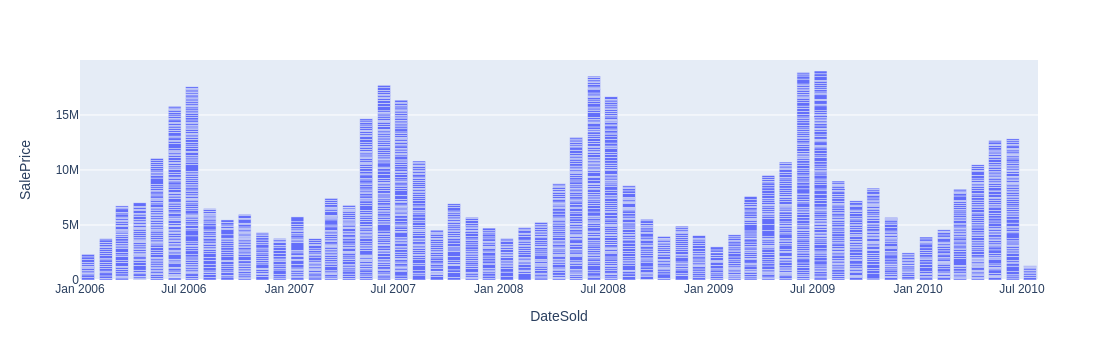

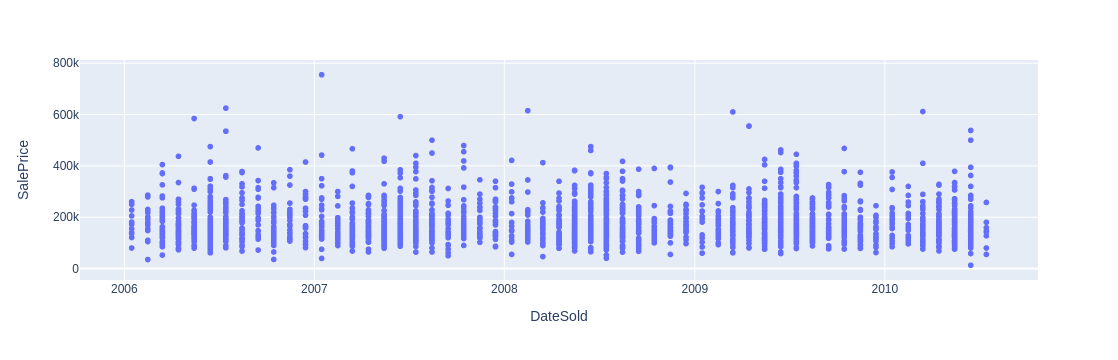

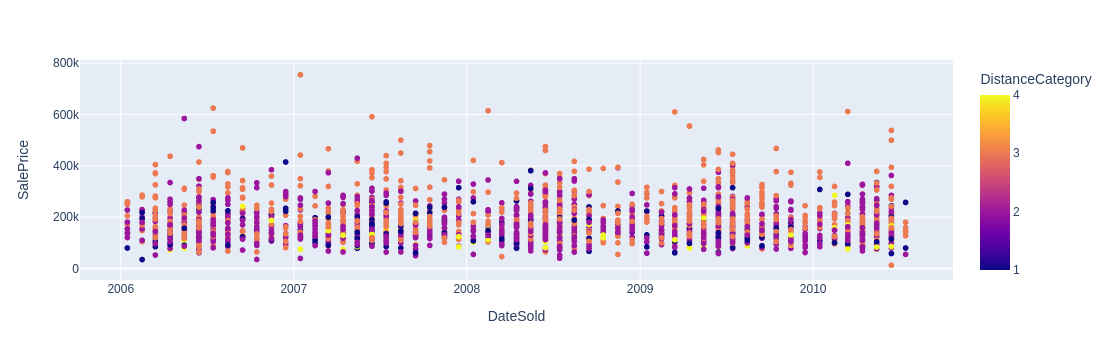

In [355]:
import plotly.express as px

features_plot = ['DateSold', 'SalePrice', 'DistanceCategory']

#fig = px.line(housing, x='DateSold', y='SalePrice')
#fig.show()

fig = px.bar(housing, x='DateSold', y='SalePrice')
fig.show()

fig = px.scatter(housing, x='DateSold', y='SalePrice')
fig.show()

#fig = px.area(housing[features_plot], facet_col='DistanceCategory', facet_col_wrap=2)
#fig.show()

#fig = px.line(housing, x='DateSold', y=housing[features_plot].columns,
#              hover_data={'DateSold': "|%B %d, %Y"},
#              title='custom tick labels')
#fig.update_xaxes(
#    dtick="M1",
#    tickformat="%b\n%Y")
#fig.show()

fig = px.scatter(housing, x='DateSold', y='SalePrice', color='DistanceCategory',
           hover_name='DistanceCategory', size_max=60)
fig.show()

#fig = px.scatter(housing, x='DateSold', y='SalePrice', size="num_pres", color="insurance",
#           hover_name="religion", log_x=True, size_max=60)
#fig.show()



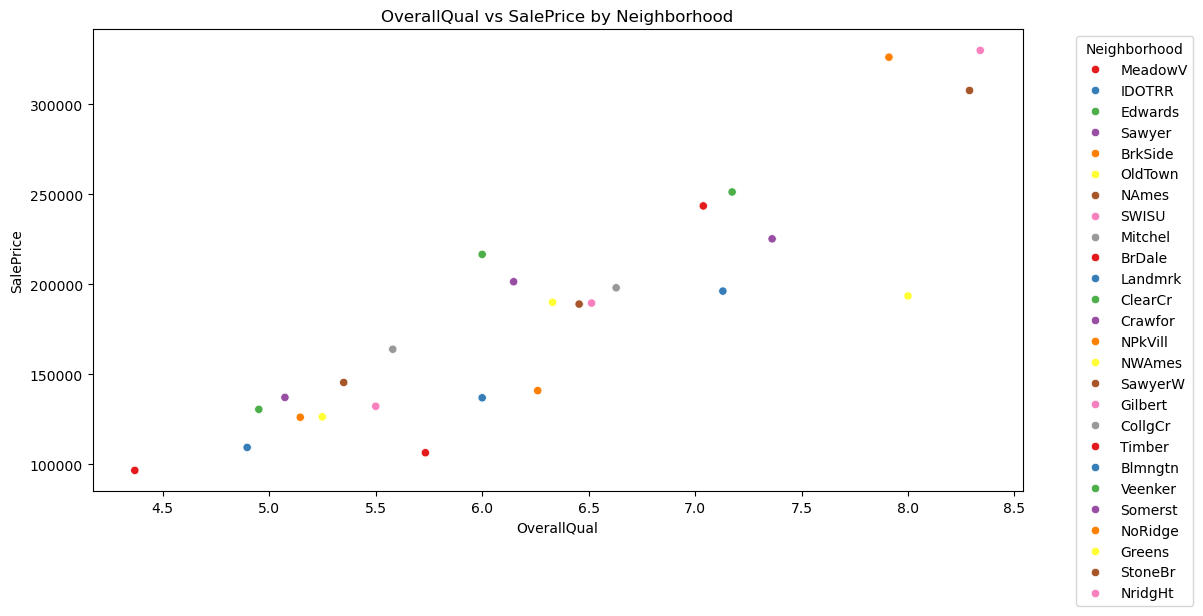

In [356]:

# Group by 'Neighborhood' and calculate the mean OverallQual and SalePrice for each group
neighborhood_stats = housing.groupby('Neighborhood').agg({'OverallQual': 'mean', 'SalePrice': 'mean'}).reset_index()

# Sort the data by mean OverallQual
neighborhood_stats = neighborhood_stats.sort_values('OverallQual')

# Create a scatterplot with a legend for neighborhoods
plt.figure(figsize=(12, 6))
sns.scatterplot(data=neighborhood_stats, x='OverallQual', y='SalePrice', hue='Neighborhood', palette='Set1')
plt.title('OverallQual vs SalePrice by Neighborhood')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


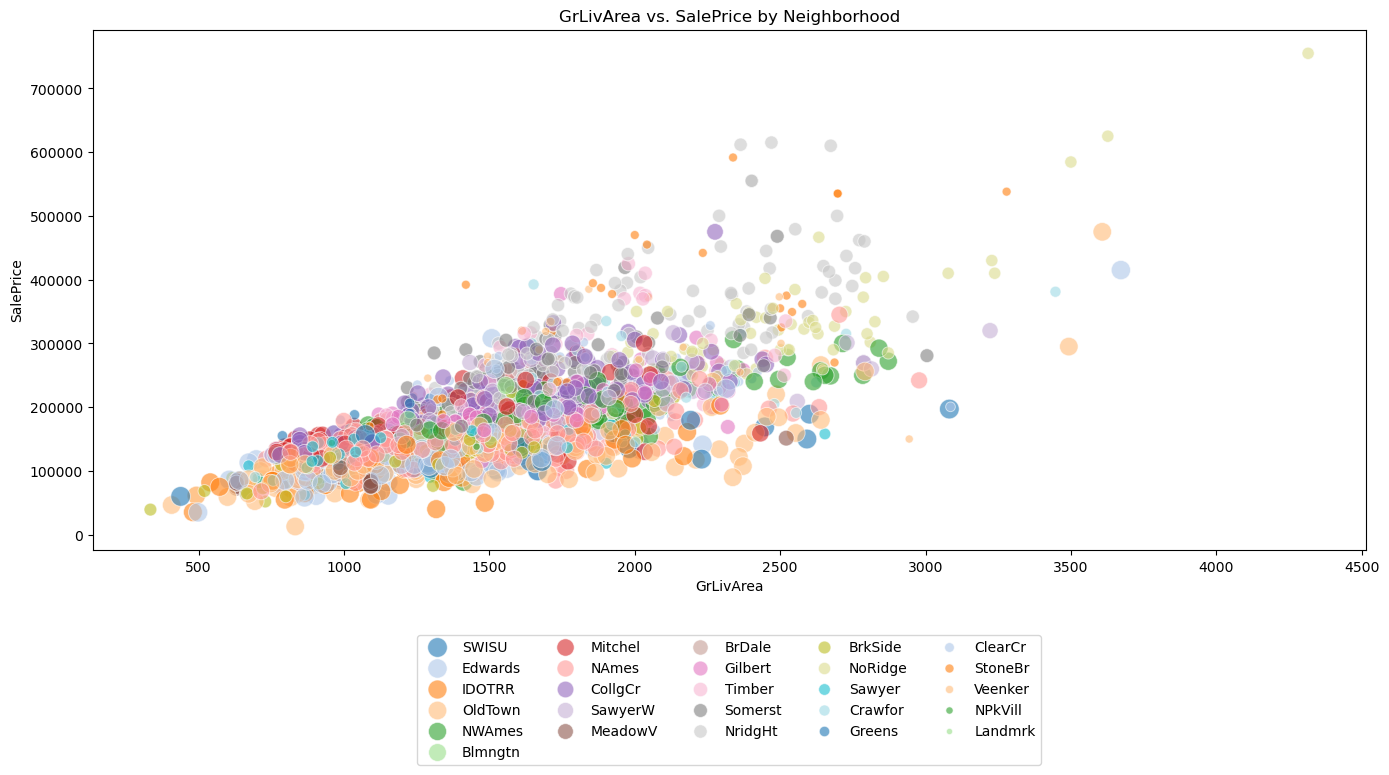

In [357]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a color palette
palette = sns.color_palette("tab20", n_colors=housing['Neighborhood'].nunique())

# Create the scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=housing, 
                x='GrLivArea', 
                y='SalePrice', 
                hue='Neighborhood',
                palette=palette,
                size='Neighborhood',
                sizes=(20, 200),
                alpha=0.6)

# Position the legend at the bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

plt.title('GrLivArea vs. SalePrice by Neighborhood')
plt.tight_layout()
plt.show()


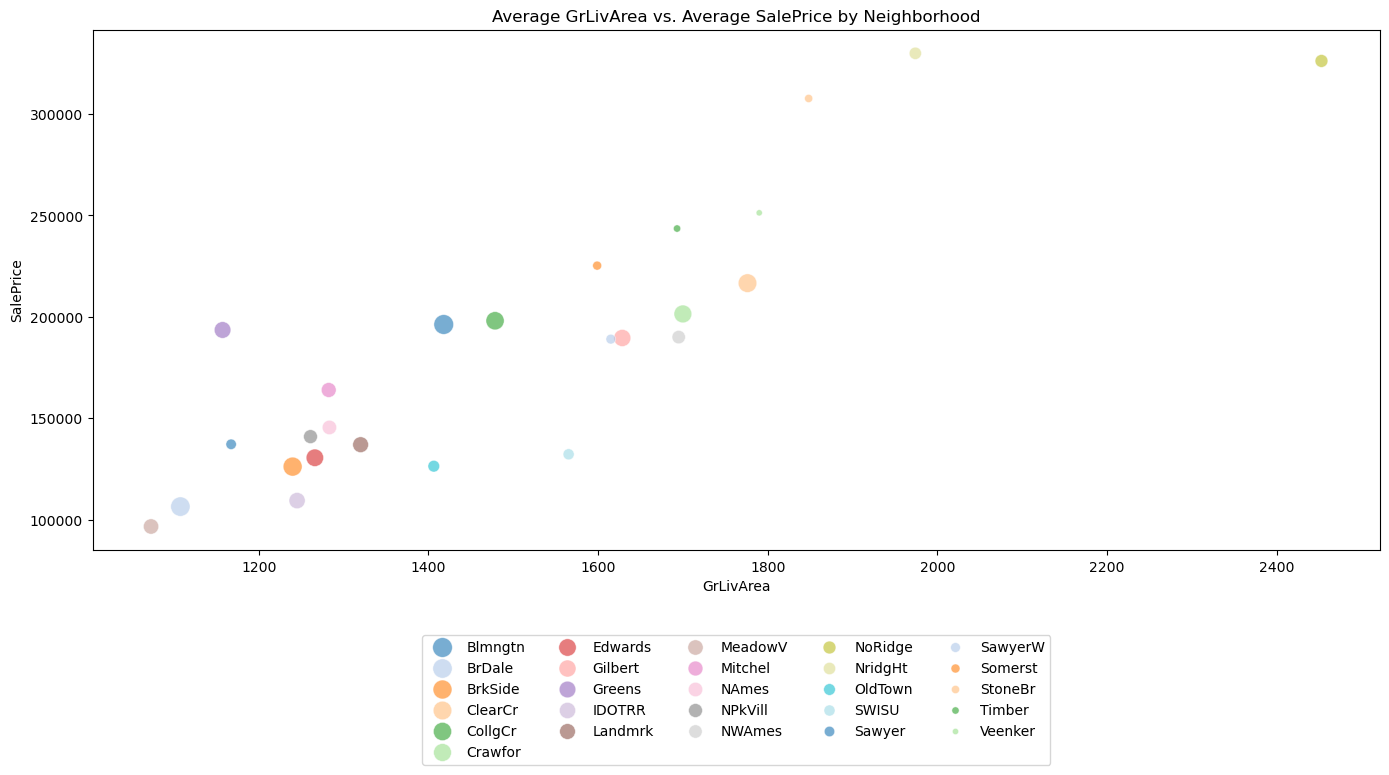

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a color palette
palette = sns.color_palette("tab20", n_colors=housing['Neighborhood'].nunique())

# Group by 'Neighborhood' and calculate the mean GrLivArea and LogSalePrice
grouped_data = housing.groupby('Neighborhood').agg({'GrLivArea': 'mean', 'SalePrice': 'mean'}).reset_index()

# Create the scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=grouped_data, 
                x='GrLivArea', 
                y='SalePrice', 
                hue='Neighborhood',
                palette=palette,
                size='Neighborhood',
                sizes=(20, 200),
                alpha=0.6)

# Position the legend at the bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

plt.title('Average GrLivArea vs. Average SalePrice by Neighborhood')
plt.tight_layout()
plt.show()


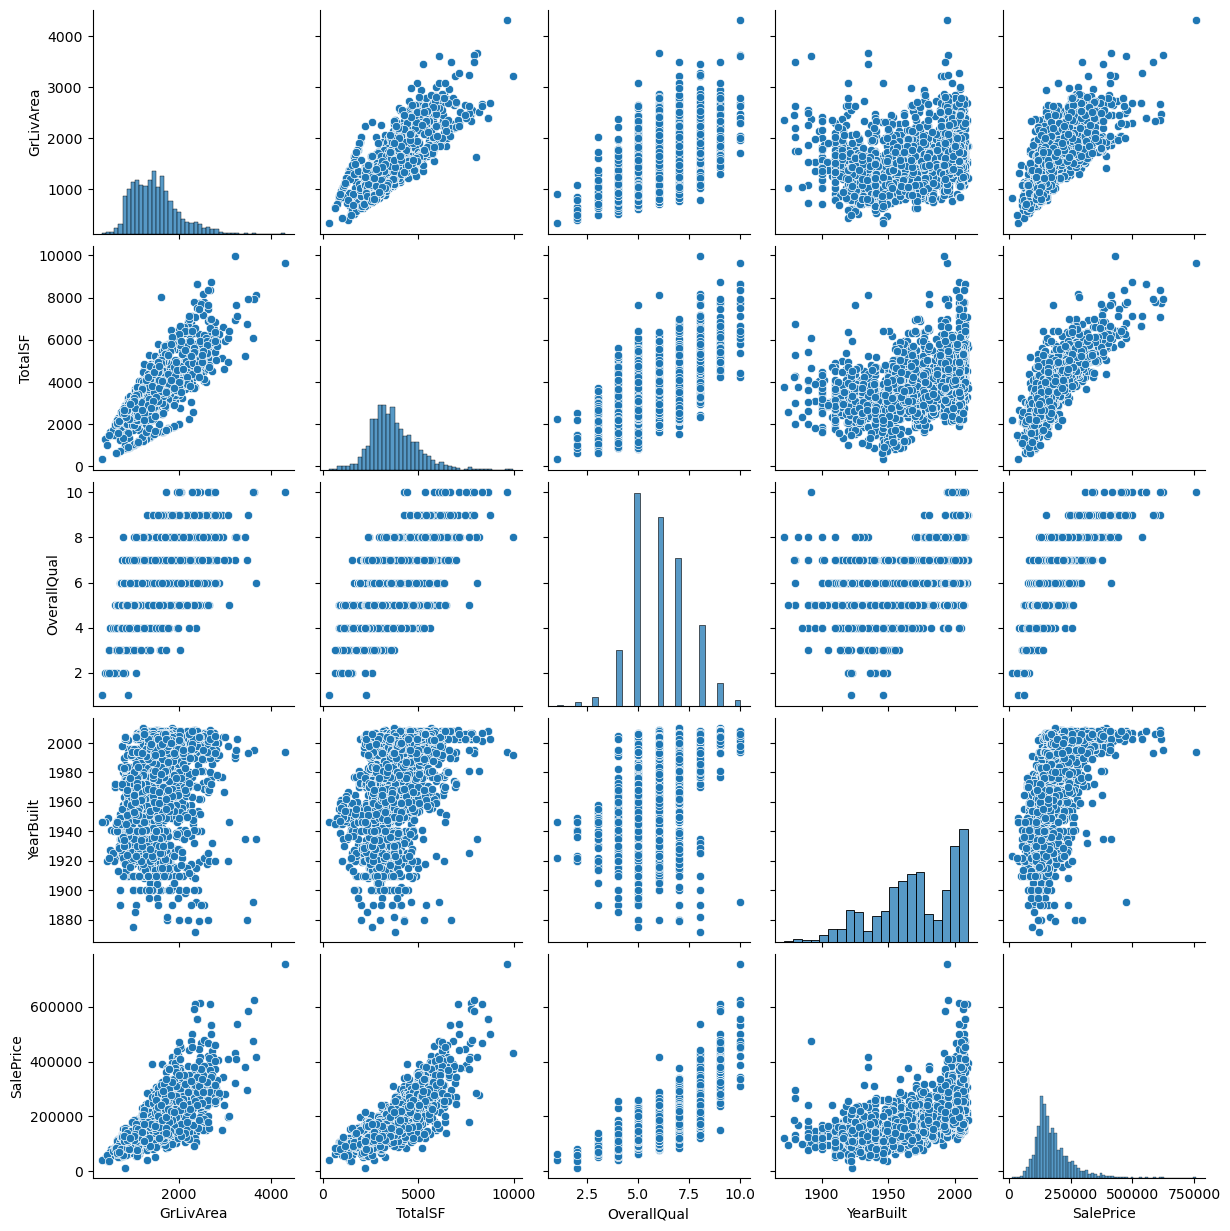

In [359]:

housing = housing.reset_index(drop=True)

# Define a subset of features to include in the scatterplot matrix
selected_features = ['GrLivArea', 'TotalSF', 'OverallQual', 'YearBuilt', 'SalePrice']

# Create a scatterplot matrix for the selected features
sns.pairplot(housing[selected_features])
plt.show()


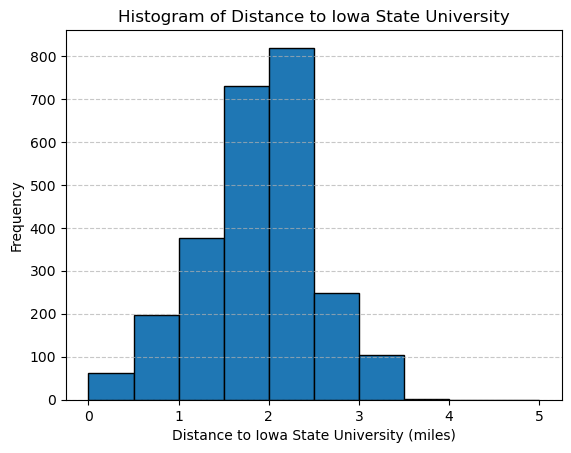

In [360]:
plt.hist(housing_coordinates['DistanceToISU'], bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], edgecolor='k')  # Adjust the bin edges as needed
plt.xlabel('Distance to Iowa State University (miles)')
plt.ylabel('Frequency')
plt.title('Histogram of Distance to Iowa State University')
plt.xticks(range(6))  # Set the x-axis ticks to match the bins
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [361]:
# Identify categorical columns
categorical_columns = housing.select_dtypes(include=['object']).columns

# Create dummy variables for categorical columns
housing = pd.get_dummies(housing, columns=categorical_columns, drop_first=True)


In [362]:
neighborhood_cols = [col for col in housing.columns if 'Neighborhood_' in col]
print(neighborhood_cols)

for col in neighborhood_cols:
    print(f"{col}: {housing[housing[col] == 1].shape[0]}")

['Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker']
Neighborhood_BrDale: 30
Neighborhood_BrkSide: 103
Neighborhood_ClearCr: 34
Neighborhood_CollgCr: 240
Neighborhood_Crawfor: 88
Neighborhood_Edwards: 163
Neighborhood_Gilbert: 144
Neighborhood_Greens: 8
Neighborhood_IDOTRR: 77
Neighborhood_Landmrk: 1
Neighborhood_MeadowV: 38
Neighborhood_Mitchel: 100
Neighborhood_NAmes: 409
Neighborhood_NPkVill: 23
Neighborhood_NWAmes: 124
Neighborhood_NoRidge: 67
Neighborho

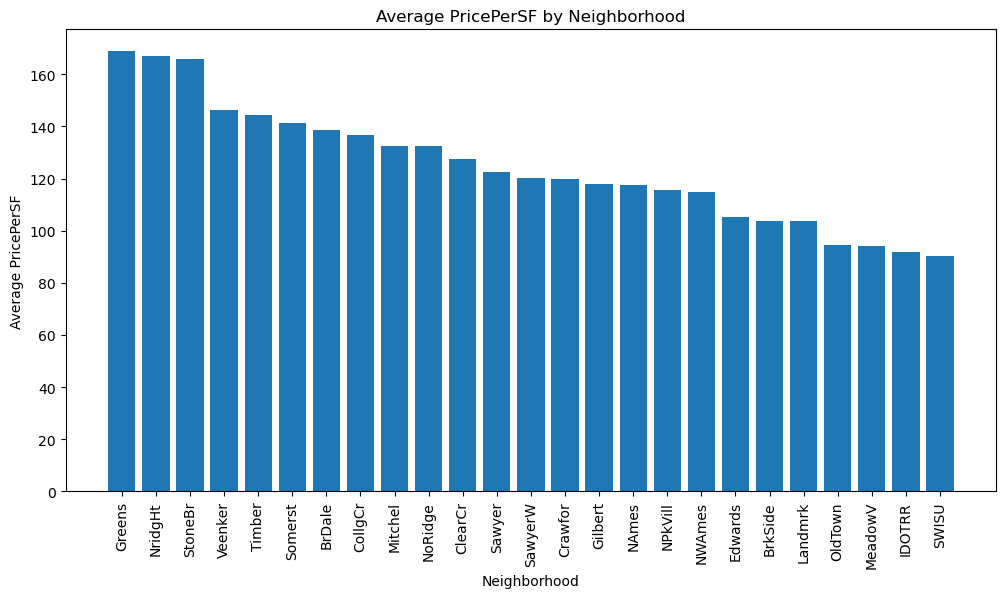

In [363]:

neighborhood_columns = [col for col in housing.columns if 'Neighborhood_' in col]


average_price_per_sf_by_neighborhood = (
    housing.groupby(neighborhood_columns)['PricePerSF']
    .mean()
    .reset_index()
)


# Sort the DataFrame by PricePerSF in descending order
average_price_per_sf_by_neighborhood = average_price_per_sf_by_neighborhood.sort_values(by='PricePerSF', ascending=False)

# Identify the neighborhood from dummy columns
average_price_per_sf_by_neighborhood['Neighborhood'] = (
    average_price_per_sf_by_neighborhood[neighborhood_columns]
    .idxmax(axis=1)
    .apply(lambda x: x.replace('Neighborhood_', ''))
)

# Now, plot using this Neighborhood column
plt.figure(figsize=(12, 6))
plt.bar(
    average_price_per_sf_by_neighborhood['Neighborhood'],
    average_price_per_sf_by_neighborhood['PricePerSF']
)
plt.title('Average PricePerSF by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average PricePerSF')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [364]:
import folium

# Create an empty dataframe
neighborhood_avg_coordinates = pd.DataFrame()

# Calculate the average latitude, longitude, and PricePerSF for each neighborhood
for neighborhood in neighborhood_columns:
    mask = housing[neighborhood] == 1
    mean_latitude = housing.loc[mask, 'latitude'].mean()
    mean_longitude = housing.loc[mask, 'longitude'].mean()
    mean_PricePerSF = housing.loc[mask, 'PricePerSF'].mean()
    
    neighborhood_avg_coordinates = neighborhood_avg_coordinates.append({
        'Neighborhood': neighborhood.replace('Neighborhood_', ''),
        'latitude': mean_latitude,
        'longitude': mean_longitude,
        'PricePerSF': mean_PricePerSF
    }, ignore_index=True)

# Initialize the base map
base_map = folium.Map(location=[housing['latitude'].mean(), 
                                housing['longitude'].mean()], 
                      zoom_start=12)

for idx, row in neighborhood_avg_coordinates.iterrows():
    if pd.notna(row['latitude']) and pd.notna(row['longitude']):
        tooltip_text = f"{row['Neighborhood']} - Avg PricePerSF: ${row['PricePerSF']:.2f}"
        folium.Marker([row['latitude'], row['longitude']], 
                      tooltip=tooltip_text).add_to(base_map)
    else:
        print(f"Missing coordinates for {row['Neighborhood']}.")


base_map


/tmp/ipykernel_49672/1689489370.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_49672/1689489370.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_49672/1689489370.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_49672/1689489370.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_49672/1689489370.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_49672/1689489370.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a 

In [365]:
# # Extract neighborhood name from dummy columns
# neighborhood_avg_coordinates['Neighborhood'] = (
#     neighborhood_avg_coordinates[neighborhood_columns]
#     .idxmax(axis=1)
#     .apply(lambda x: x.replace('Neighborhood_', ''))
# )

# # The latitude and longitude here are arbitrarily taken to be the mean values for your dataset; 
# # you can change this to center the map better based on your dataset
# base_map = folium.Map(location=[housing_coordinates['latitude'].mean(), 
#                                 housing_coordinates['longitude'].mean()], 
#                       zoom_start=12)

# for idx, row in neighborhood_avg_coordinates.iterrows():
#     tooltip_text = f"{row['Neighborhood']} - Avg PricePerSF: ${row['PricePerSF']:.2f}"
#     folium.Marker([row['latitude'], row['longitude']], 
#                   tooltip=tooltip_text).add_to(base_map)

# base_map


In [366]:
import folium

# Check if 'Neighborhood' column exists in the dataframe
if 'Neighborhood' not in neighborhood_avg_coordinates.columns:
    if neighborhood_columns:  # If there are neighborhood dummy columns
        neighborhood_avg_coordinates['Neighborhood'] = (
            neighborhood_avg_coordinates[neighborhood_columns]
            .idxmax(axis=1)
            .apply(lambda x: x.replace('Neighborhood_', ''))
        )

# Drop rows where 'latitude' or 'longitude' is NaN
neighborhood_avg_coordinates = neighborhood_avg_coordinates.dropna(subset=['latitude', 'longitude'])

        
base_map = folium.Map(location=[housing['latitude'].mean(), 
                                housing['longitude'].mean()], 
                      zoom_start=12)

for idx, row in neighborhood_avg_coordinates.iterrows():
    tooltip_text = f"{row['Neighborhood']} - Avg PricePerSF: ${row['PricePerSF']:.2f}"
    folium.Marker([row['latitude'], row['longitude']], 
                  tooltip=tooltip_text).add_to(base_map)

base_map


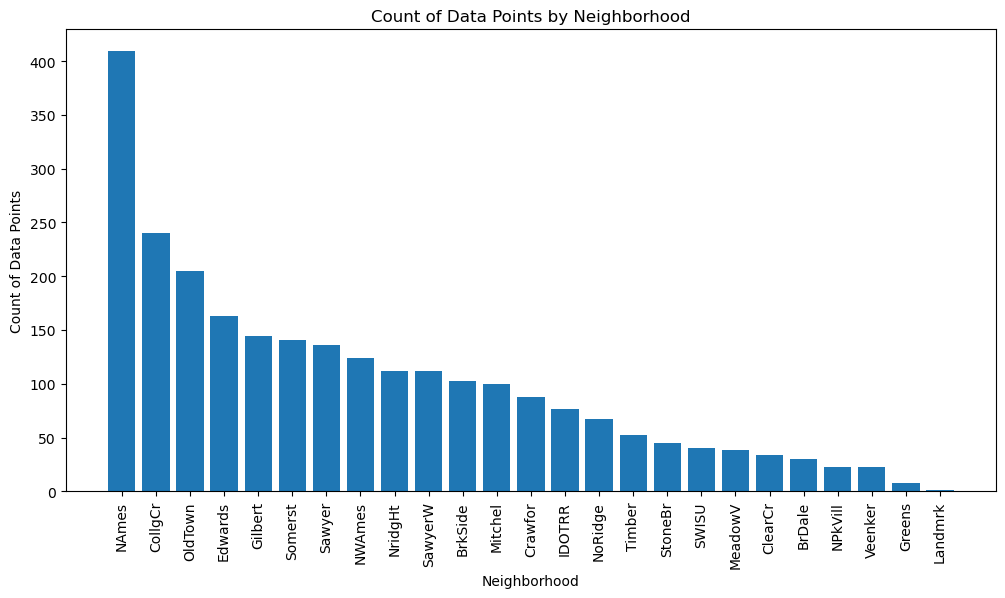

In [367]:
import matplotlib.pyplot as plt

# List of neighborhood columns
neighborhood_cols = [col for col in housing.columns if 'Neighborhood_' in col]

# Count the number of data points for each neighborhood
neighborhood_counts = [housing[col].sum() for col in neighborhood_cols]

# Names of neighborhoods (remove the 'Neighborhood_' prefix)
neighborhood_names = [col.replace('Neighborhood_', '') for col in neighborhood_cols]

# Sort based on counts
sorted_indices = sorted(range(len(neighborhood_counts)), key=lambda k: neighborhood_counts[k], reverse=True)
neighborhood_counts = [neighborhood_counts[i] for i in sorted_indices]
neighborhood_names = [neighborhood_names[i] for i in sorted_indices]


# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(neighborhood_names, neighborhood_counts)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Neighborhood')
plt.ylabel('Count of Data Points')
plt.title('Count of Data Points by Neighborhood')
plt.show()


In [368]:
# Calculate correlations between each neighborhood and SalesPrice
correlations = housing.corr()['SalePrice'].sort_values()

# Filter just the neighborhoods
neighborhood_correlations = correlations[correlations.index.str.startswith('Neighborhood_')]

# Display the results
print(neighborhood_correlations)

Neighborhood_OldTown   -0.202383
Neighborhood_NAmes     -0.188954
Neighborhood_Edwards   -0.164488
Neighborhood_IDOTRR    -0.160313
Neighborhood_BrkSide   -0.140979
Neighborhood_MeadowV   -0.132464
Neighborhood_Sawyer    -0.128597
Neighborhood_BrDale    -0.103370
Neighborhood_SWISU     -0.076610
Neighborhood_NPkVill   -0.046927
Neighborhood_Mitchel   -0.038044
Neighborhood_Landmrk   -0.010782
Neighborhood_Greens     0.011359
Neighborhood_SawyerW    0.030623
Neighborhood_NWAmes     0.035289
Neighborhood_Gilbert    0.036807
Neighborhood_Crawfor    0.058031
Neighborhood_ClearCr    0.058984
Neighborhood_CollgCr    0.084601
Neighborhood_Veenker    0.092080
Neighborhood_Timber     0.124506
Neighborhood_Somerst    0.150369
Neighborhood_StoneBr    0.229170
Neighborhood_NoRidge    0.320995
Neighborhood_NridgHt    0.429506
Name: SalePrice, dtype: float64


In [369]:
nan_counts = neighborhood_avg_coordinates[['latitude', 'longitude']].isna().sum()
print(nan_counts)


latitude     0
longitude    0
dtype: int64


In [370]:
import folium

# Drop rows where 'latitude' or 'longitude' are NaN
neighborhood_avg_coordinates.dropna(subset=['latitude', 'longitude'], inplace=True)

# Ensure the latitude and longitude are of float type
neighborhood_avg_coordinates['latitude'] = neighborhood_avg_coordinates['latitude'].astype(float)
neighborhood_avg_coordinates['longitude'] = neighborhood_avg_coordinates['longitude'].astype(float)


# Calculate correlations between each neighborhood and SalePrice
correlations = housing.corr()['SalePrice'].sort_values()

# Filter just the neighborhoods
neighborhood_correlations = correlations[correlations.index.str.startswith('Neighborhood_')].to_dict()

# The latitude and longitude here are taken to be the mean values for your dataset
base_map = folium.Map(location=[housing['latitude'].mean(), 
                                housing['longitude'].mean()], 
                      zoom_start=12)

for idx, row in neighborhood_avg_coordinates.iterrows():
    neighborhood = row['Neighborhood']
    if 'Neighborhood_' + neighborhood in neighborhood_correlations:
        correlation = neighborhood_correlations['Neighborhood_' + neighborhood]
        color = 'green' if correlation > 0 else 'red'
        tooltip_text = f"{neighborhood} - Correlation: {correlation:.2f}"
        folium.Marker([row['latitude'], row['longitude']], 
                      tooltip=tooltip_text, 
                      icon=folium.Icon(color=color)).add_to(base_map)
    else:
        # Default to gray if the neighborhood is not in the correlation data
        tooltip_text = f"{neighborhood} - No Correlation Data"
        folium.Marker([row['latitude'], row['longitude']], 
                      tooltip=tooltip_text, 
                      icon=folium.Icon(color='gray')).add_to(base_map)

base_map


In [371]:
print(neighborhood_avg_coordinates.columns)

missing_columns = [col for col in neighborhood_columns if col not in neighborhood_avg_coordinates.columns]
print(missing_columns)


Index(['Neighborhood', 'latitude', 'longitude', 'PricePerSF'], dtype='object')
['Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker']
